<a href="https://colab.research.google.com/github/kundajelab/feature_interactions/blob/master/zeropadding/EvaluateModelsGivenPredictionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/train_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/train_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_orig_neg.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_orig_pos.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_pos_interactions.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_toanalyze_groundtruth_neg_maineff.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/shuff_toanalyze_orig_oraclepred_neg.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/shuff_toanalyze_orig_oraclepred_pos.txt.gz

--2020-06-30 04:20:27--  https://github.com/kundajelab/feature_interactions/raw/78d4a6b/zeropadding/data/test_neg_labels.txt.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kundajelab/feature_interactions/78d4a6bb7cc34b940fa2b68dba2c7fb91141a165/zeropadding/data/test_neg_labels.txt.gz [following]
--2020-06-30 04:20:28--  https://raw.githubusercontent.com/kundajelab/feature_interactions/78d4a6bb7cc34b940fa2b68dba2c7fb91141a165/zeropadding/data/test_neg_labels.txt.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 529495 (517K) [application/octet-stream]
Saving to: ‘test_neg_labels.txt.gz’

test_neg

In [3]:
!gunzip -f *.gz

In [4]:
!md5sum *

md5sum: sample_data: Is a directory
6093d9043a00d2bfa3fdc6859572e9b7  shuff_toanalyze_orig_oraclepred_neg.txt
d2e04fad6e6e98c3f9c3ef1fc08fe23b  shuff_toanalyze_orig_oraclepred_pos.txt
39fc6fc8d08dd8841426d1d2fe494012  test_neg_labels.txt
79d5b7333ba54c24589fcaacf89012f4  test_pos_labels.txt
002b916226815c1d826486666c2d2473  test_toanalyze_groundtruth_neg_maineff.txt
dbdbb4750187547a5fe035f3df27c87f  test_toanalyze_groundtruth_orig_neg.txt
14d291068b82b0c7db298b90e2155a3a  test_toanalyze_groundtruth_orig_pos.txt
adb5edc65ee6060f2770f19bf344a48c  test_toanalyze_groundtruth_pos_interactions.txt
28cc4a0c1e8884dbeab0c328b1a29f07  test_toanalyze_orig_neg_labels.txt
7d1ba501734d12678c78f53cc2ab7e54  test_toanalyze_orig_pos_labels.txt
8cd9559ad168d2e7f0a4d20e906e6e02  train_toanalyze_orig_neg_labels.txt
58f3dced1b6ae204e8450b68f6c9f19b  train_toanalyze_orig_pos_labels.txt


In [5]:
from google.colab import drive
drive.mount('/content/drive')

!ln -s /content/drive/My\ Drive/colab_notebook_data/feature_interactions/model_preds_zeropadding/ model_preds
!ls model_preds

#!wget https://github.com/kundajelab/feature_interactions/raw/619bc75/av/model_preds.tgz
#!tar -xzf model_preds.tgz model_preds

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed100_bemnn.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed200_dmeaz.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed300_vwlzj.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed400_vyqvb.h5
negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed500_msloc.h5
negcontrol_model-anscombemse_arch1_l1reg-0.001_seed100_tiefn.h5
negcontrol_model-anscombemse_arch1_l1reg-0.001_seed200_iwhrl.h5
negcontrol_

In [6]:
import numpy as np
from collections import namedtuple


#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels) 
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return


def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1


def anscombe_transform(vals):
  assert np.min(vals)>=(-3.0/8), np.min(vals)
  return 2*np.sqrt(vals + 3.0/8)


def load_onehot_sequences(filename):
  return np.array([one_hot_encode_along_channel_axis(x.rstrip())
                   for x in open(filename)])


def load_numerical(filename):
  return np.array([float(x.rstrip()) for x in open(filename)])


def read_labels_and_oracle(filename):
  labels = np.array([float(x.split("\t")[0]) for
                      x in open(filename)])
  oracle = np.array([float(x.split("\t")[1]) for
                      x in open(filename)])
  return labels, oracle


test_pos_labels, test_pos_oracle =\
  read_labels_and_oracle("test_pos_labels.txt")
test_neg_labels, test_neg_oracle =\
  read_labels_and_oracle("test_neg_labels.txt")

test_toanalyze_orig_neg_labels =\
  load_numerical("test_toanalyze_orig_neg_labels.txt")
test_toanalyze_orig_pos_labels =\
  load_numerical("test_toanalyze_orig_pos_labels.txt")

train_toanalyze_orig_neg_labels =\
  load_numerical("train_toanalyze_orig_neg_labels.txt")
train_toanalyze_orig_pos_labels =\
  load_numerical("train_toanalyze_orig_pos_labels.txt")

test_toanalyze_groundtruth_neg_maineff=\
  load_numerical("test_toanalyze_groundtruth_neg_maineff.txt")
test_toanalyze_groundtruth_pos_interactions=\
  load_numerical("test_toanalyze_groundtruth_pos_interactions.txt")

shuff_toanalyze_orig_oraclepred_neg =\
  load_numerical("shuff_toanalyze_orig_oraclepred_neg.txt")
shuff_toanalyze_orig_oraclepred_pos =\
  load_numerical("shuff_toanalyze_orig_oraclepred_pos.txt")

In [113]:
from collections import namedtuple
import scipy.stats
import h5py
import numpy as np
from matplotlib import pyplot as plt


def anscombemse_loss(preds, labels):
  return np.square(anscombe_transform(preds)-anscombe_transform(labels))


def rescalepoisson_loss(preds, labels):
  return preds - labels*np.log(preds)


#positive means interaction improved the loss
def compute_lossimprovement(orig_preds, maineff_preds, labels,
                            lossfunc, valthresh):
  assert np.min(orig_preds) > valthresh, np.min(orig_preds)
  assert np.min(labels) > valthresh, np.min(labels)
  #for anscomebmse: for the purpose of avoiding taking sqrt of negative number,
  # make sure maineff preds > (-3.0/8). For poisson: need a positive number.
  #The reason we can get smaller
  # maineff preds than this is that we are computing main effects in counts
  # space, whereas model predictions are in anscombe transform space.
  if (np.min(maineff_preds) < valthresh):
    print("Warning: too-low maineff preds in % examples:",
          np.mean(maineff_preds < valthresh))
    maineff_preds = np.maximum(maineff_preds, valthresh)
  
  maineffpreds_loss = lossfunc(preds=maineff_preds, labels=labels)
  origpreds_loss = lossfunc(preds=orig_preds, labels=labels)

  return ((maineffpreds_loss - origpreds_loss),
          maineffpreds_loss, origpreds_loss)


InteractionEffectData = namedtuple("InteractionEffectData",
  ["orig_preds", "A_main_eff", "B_main_eff", "inter_eff", "maineff_preds"])


def get_interactioneffectdata(modelpredsfile, perturbedseqskey):
  model_h5 = h5py.File(modelpredsfile, "r")
  orig_preds = np.array(model_h5[perturbedseqskey]['orig_onehot_preds'])
  Aoff_preds = np.array(model_h5[perturbedseqskey]['Aoff_onehot_preds'])
  Boff_preds = np.array(model_h5[perturbedseqskey]['Boff_onehot_preds'])
  bothoff_preds = np.array(model_h5[perturbedseqskey]['bothoff_onehot_preds'])
  model_h5.close()

  A_main_eff = (Boff_preds - bothoff_preds)
  B_main_eff = (Aoff_preds - bothoff_preds)
  inter_eff = (orig_preds - bothoff_preds) - (A_main_eff + B_main_eff)
  maineff_preds = bothoff_preds + A_main_eff + B_main_eff

  return InteractionEffectData(orig_preds=orig_preds, A_main_eff=A_main_eff,
                               B_main_eff=B_main_eff, inter_eff=inter_eff,
                               maineff_preds=maineff_preds)


InteractionAnalysis = namedtuple("InteractionAnalysis",
  ["overall_test_loss",
   "test_toanalyze_maineffpreds_loss",
   "test_toanalyze_origpreds_loss",
   
   "test_toanalyze_interactioneffectdata",
   "test_toanalyze_lossimprovement",
   
   "controltest_toanalyze_lossimprovement",

   "shuff_toanalyze_interactioneffectdata",
   "shuff_toanalyze_lossimprovement",

   "train_toanalyze_interactioneffectdata",
   "train_toanalyze_lossimprovement",

   "controltrain_toanalyze_lossimprovement",
   
   "test_toanalyze_intereff_wilcoxon",
   "test_toanalyze_lossimprovement_wilcoxon",
   "test_toanalyze_lossimprovement_mannwhit",
   "test_v_controltest_lossimp_mannwhit",
   "test_v_controltest_intereff_mag_mannwhit",
   
   "train_toanalyze_lossimprovement_wilcoxon",
   "train_toanalyze_lossimprovement_mannwhit",
   "train_v_controltrain_lossimp_mannwhit",
   "train_v_test_lossimp_mannwhit",
   "train_v_controltrain_intereff_mag_mannwhit",

   "test_v_shuff_intereff_mag_mannwhit",
   "test_v_shuff_lossimp_mannwhit"
   ])


def perform_interaction_analysis(modelpredsfile,
                                 all_test_labels,
                                 all_test_oracle,
                                 test_toanalyze_labels,
                                 train_toanalyze_labels,
                                 shuff_toanalyze_oraclepreds,
                                 lossfunc, valthresh):
  overall_test_loss = lossfunc(
        preds=np.array(h5py.File(modelpredsfile,"r")["all_test_preds"][:]),
        labels=all_test_labels)
  print("overall test loss", np.mean(overall_test_loss))
  
  test_toanalyze_interactioneffectdata = get_interactioneffectdata(
          modelpredsfile=modelpredsfile,
          perturbedseqskey='test_toanalyze_perturbedseqs')
  
  
  if ("negcontrol" in modelpredsfile):
    print(modelpredsfile)
    plt.scatter(np.array(h5py.File(modelpredsfile,"r")["all_test_preds"][:]),
                all_test_oracle, alpha=0.01)
    plt.plot(all_test_oracle, all_test_oracle, color="black")
    plt.xlabel("Test Preds")
    plt.ylabel("Test Oracle")
    plt.show()

    pred_maineff = (test_toanalyze_interactioneffectdata.A_main_eff
                    + test_toanalyze_interactioneffectdata.B_main_eff)
    plt.scatter(test_toanalyze_groundtruth_neg_maineff, pred_maineff)
    plt.plot(test_toanalyze_groundtruth_neg_maineff,
            test_toanalyze_groundtruth_neg_maineff,
            color="black")
    plt.xlabel("(Neg control) ground truth A_main_eff + B_main_eff")
    plt.ylabel("Pred A_main_eff + B_main_eff")
    plt.show()

    mainefferror = test_toanalyze_groundtruth_neg_maineff - pred_maineff
    intereff = test_toanalyze_interactioneffectdata.inter_eff
    plt.scatter(mainefferror, intereff)
    plt.plot(mainefferror, mainefferror, color="black")
    plt.xlabel("mainefferror")
    plt.ylabel("intereff")
    plt.show()

  controltest_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='controltest_toanalyze_perturbedseqs')

  (test_toanalyze_lossimprovement, test_toanalyze_maineffpreds_loss,
   test_toanalyze_origpreds_loss)= compute_lossimprovement(
      orig_preds=test_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=test_toanalyze_interactioneffectdata.maineff_preds,
      labels=test_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  controltest_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=controltest_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=controltest_toanalyze_interactioneffectdata.maineff_preds,
      labels=test_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  
  train_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='train_toanalyze_perturbedseqs')
  controltrain_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='controltrain_toanalyze_perturbedseqs')
  
  (train_toanalyze_lossimprovement, train_toanalyze_maineffpreds_loss,
   train_toanalyze_origpreds_loss) = compute_lossimprovement(
      orig_preds=train_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=train_toanalyze_interactioneffectdata.maineff_preds,
      labels=train_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  controltrain_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=controltrain_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=controltrain_toanalyze_interactioneffectdata.maineff_preds,
      labels=train_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  
  shuff_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='shuff_toanalyze_perturbedseqs')
  shuff_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=shuff_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=shuff_toanalyze_interactioneffectdata.maineff_preds,
      labels=shuff_toanalyze_oraclepreds,
      lossfunc=lossfunc, valthresh=valthresh)
  
  test_toanalyze_intereff_wilcoxon = scipy.stats.wilcoxon(
      x=test_toanalyze_interactioneffectdata.inter_eff,
      alternative="two-sided")
  
  test_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=test_toanalyze_lossimprovement,
    alternative="greater")
  test_toanalyze_lossimprovement_mannwhit = scipy.stats.mannwhitneyu(
    x=test_toanalyze_maineffpreds_loss,
    y=test_toanalyze_origpreds_loss,
    alternative="greater")
  test_v_controltest_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=test_toanalyze_lossimprovement,
      y=controltest_toanalyze_lossimprovement,
      alternative="greater")
  test_v_controltest_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(test_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(controltest_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  
  train_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=train_toanalyze_lossimprovement,
    alternative="greater")
  train_toanalyze_lossimprovement_mannwhit = scipy.stats.mannwhitneyu(
    x=train_toanalyze_maineffpreds_loss,
    y=train_toanalyze_origpreds_loss,
    alternative="greater")
  train_v_controltrain_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=train_toanalyze_lossimprovement,
      y=controltrain_toanalyze_lossimprovement,
      alternative="greater")
  train_v_controltrain_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(train_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(controltrain_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  
  train_v_test_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=train_toanalyze_lossimprovement,
      y=test_toanalyze_lossimprovement,
      alternative="greater")
  
  test_v_shuff_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(test_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(shuff_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  test_v_shuff_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=test_toanalyze_lossimprovement,
      y=shuff_toanalyze_lossimprovement,
      alternative="greater")
  
  return InteractionAnalysis(
      
      overall_test_loss=overall_test_loss,
      test_toanalyze_maineffpreds_loss=test_toanalyze_maineffpreds_loss,
      test_toanalyze_origpreds_loss=test_toanalyze_origpreds_loss,

      test_toanalyze_interactioneffectdata=
        test_toanalyze_interactioneffectdata,
      test_toanalyze_lossimprovement=test_toanalyze_lossimprovement,

      controltest_toanalyze_lossimprovement=
       controltest_toanalyze_lossimprovement,
      
      shuff_toanalyze_interactioneffectdata=
        shuff_toanalyze_interactioneffectdata,
      shuff_toanalyze_lossimprovement=
        shuff_toanalyze_lossimprovement,

      train_toanalyze_interactioneffectdata=
        train_toanalyze_interactioneffectdata,
      train_toanalyze_lossimprovement=train_toanalyze_lossimprovement,

      controltrain_toanalyze_lossimprovement=
        controltrain_toanalyze_lossimprovement,

      test_toanalyze_intereff_wilcoxon=
        test_toanalyze_intereff_wilcoxon,
      test_toanalyze_lossimprovement_wilcoxon=
        test_toanalyze_lossimprovement_wilcoxon,
      test_toanalyze_lossimprovement_mannwhit=
        test_toanalyze_lossimprovement_mannwhit,
      test_v_controltest_lossimp_mannwhit=
        test_v_controltest_lossimp_mannwhit,
      test_v_controltest_intereff_mag_mannwhit=
        test_v_controltest_intereff_mag_mannwhit,
      
      train_toanalyze_lossimprovement_wilcoxon=
        train_toanalyze_lossimprovement_wilcoxon,
      train_toanalyze_lossimprovement_mannwhit=
        train_toanalyze_lossimprovement_mannwhit,
      train_v_controltrain_lossimp_mannwhit=
        train_v_controltrain_lossimp_mannwhit,
      train_v_controltrain_intereff_mag_mannwhit=
        train_v_controltrain_intereff_mag_mannwhit,

      train_v_test_lossimp_mannwhit=train_v_test_lossimp_mannwhit,

      test_v_shuff_intereff_mag_mannwhit=test_v_shuff_intereff_mag_mannwhit,
      test_v_shuff_lossimp_mannwhit=test_v_shuff_lossimp_mannwhit
    )

In [114]:
import glob

MODEL_PREDS_FOLDER = "model_preds"
#negcontrol_modelpredsfiles =\
#  glob.glob(MODEL_PREDS_FOLDER+"/negcontrol_*anscombemse*_seed*.h5")
#poscontrol_modelpredsfiles =\
#  glob.glob(MODEL_PREDS_FOLDER+"/poscontrol_*anscombemse*_seed*.h5")

negcontrol_modelpredsfiles =\
  glob.glob(MODEL_PREDS_FOLDER+"/negcontrol_*rescalepoisson*_seed*.h5")
poscontrol_modelpredsfiles =\
  glob.glob(MODEL_PREDS_FOLDER+"/poscontrol_*rescalepoisson*_seed*.h5")

#negcontrol_modelfiles = glob.glob("trained_models//negcontrol_*_seed100*.h5")
#poscontrol_modelfiles = glob.glob("trained_models//poscontrol_*_seed100*.h5")

#negcontrol_modelfiles = """negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5""".split("\n")
#poscontrol_modelfiles = """poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5""".split("\n")

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed100_nlwef.h5
overall test loss -623.9756997801113
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed100_nlwef.h5


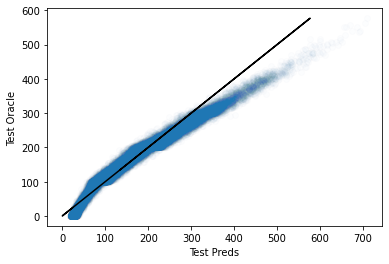

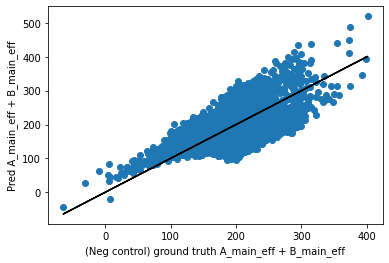

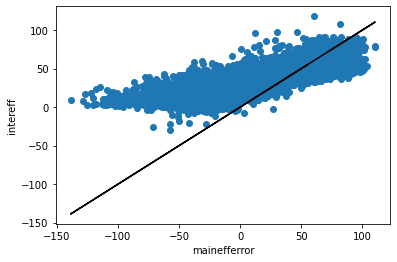

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed100_lawff.h5
overall test loss -626.7279326450946
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed100_lawff.h5


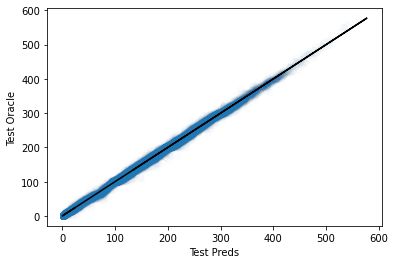

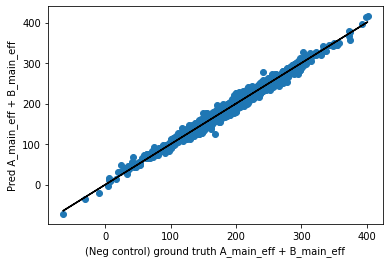

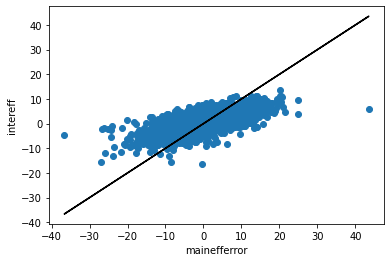

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed100_nfwlk.h5
overall test loss -626.7719728046727
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed100_nfwlk.h5


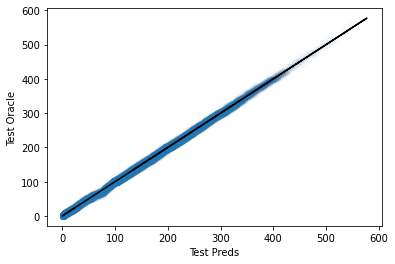

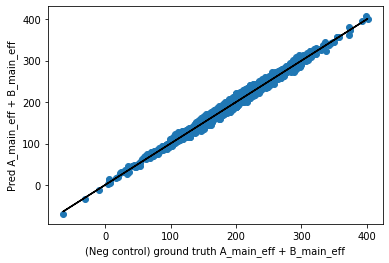

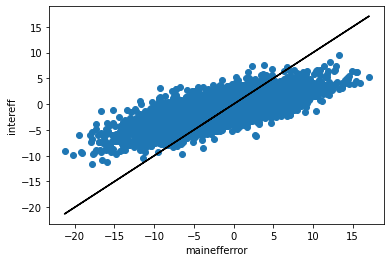

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed100_tlobk.h5
overall test loss -623.9841502308083
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed100_tlobk.h5


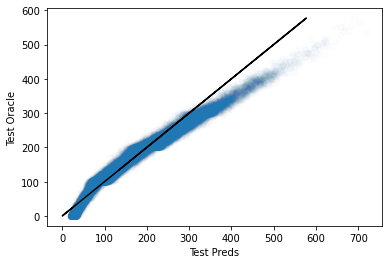

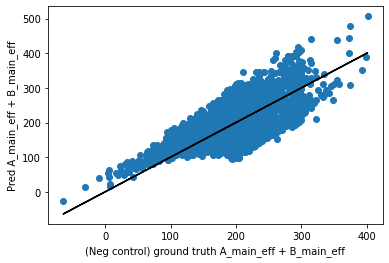

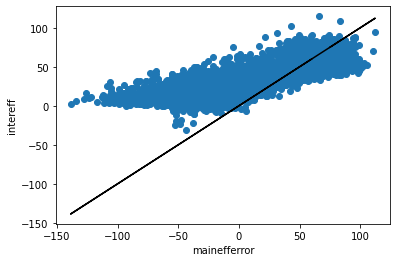

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed100_ntgvf.h5
overall test loss -626.7424738280619
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed100_ntgvf.h5


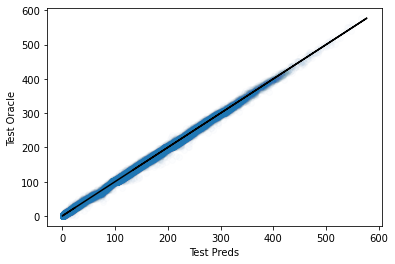

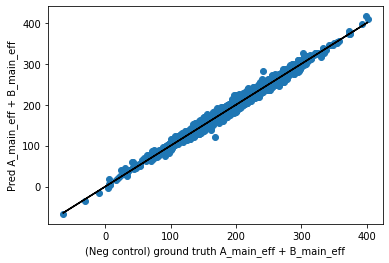

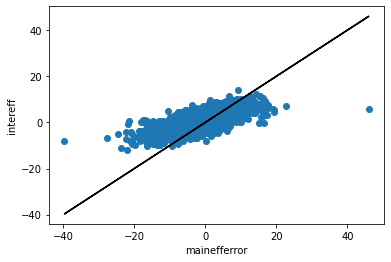

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed100_koolv.h5
overall test loss -626.7797217323954
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed100_koolv.h5


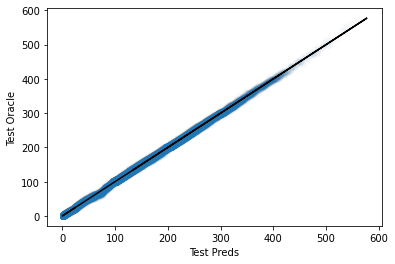

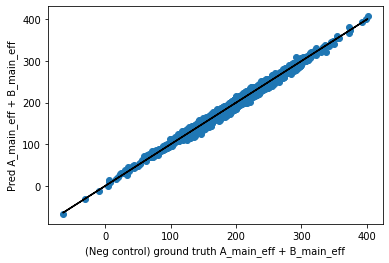

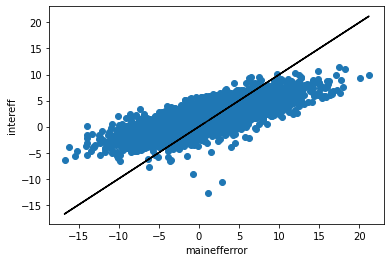

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed100_hkvqp.h5
overall test loss -624.1142703728437
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed100_hkvqp.h5


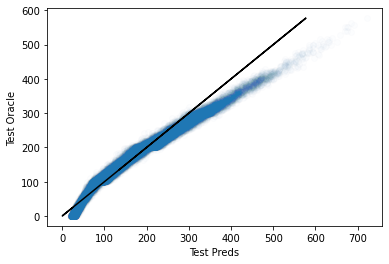

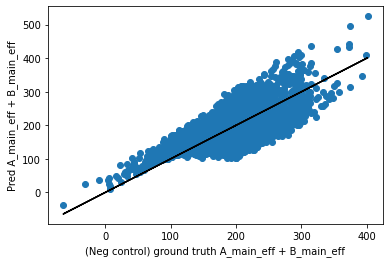

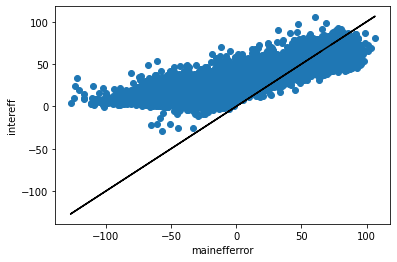

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed100_ojogi.h5
overall test loss -626.772821455673
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed100_ojogi.h5


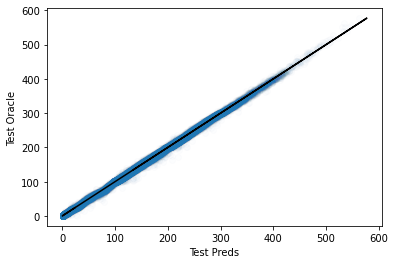

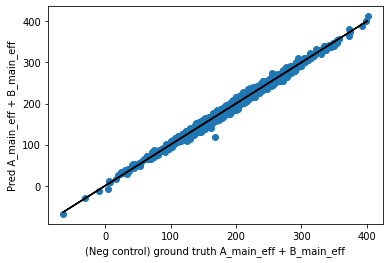

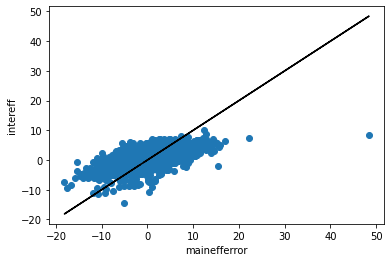

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed100_mtaow.h5
overall test loss -626.7764725124773
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed100_mtaow.h5


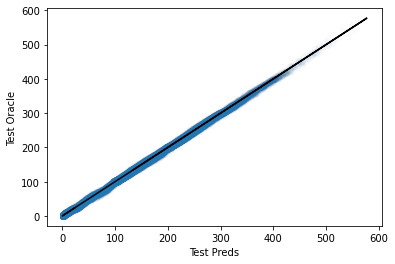

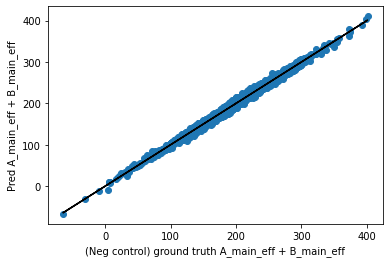

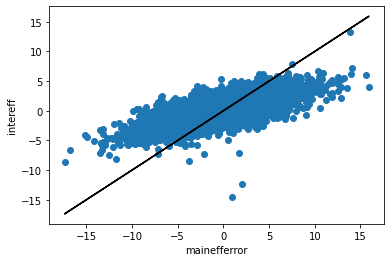

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed200_zrhsq.h5
overall test loss -624.1098455177116
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed200_zrhsq.h5


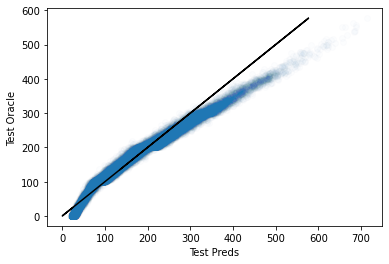

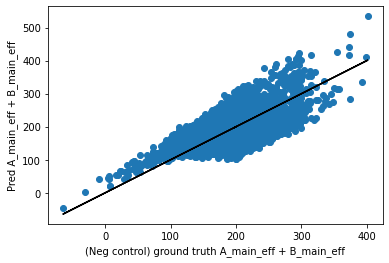

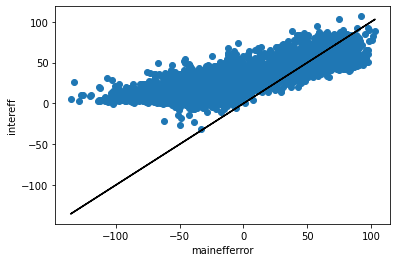

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed200_rhgkp.h5
overall test loss -626.7406133201466
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed200_rhgkp.h5


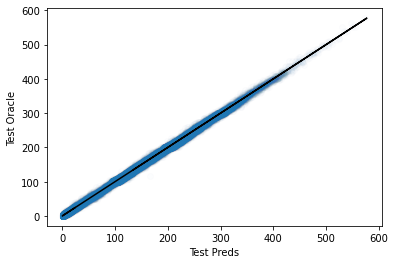

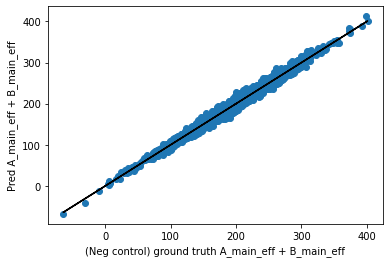

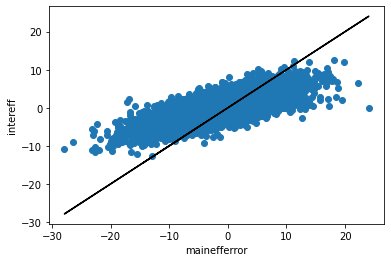

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed200_oqbpf.h5
overall test loss -626.7785924570003
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed200_oqbpf.h5


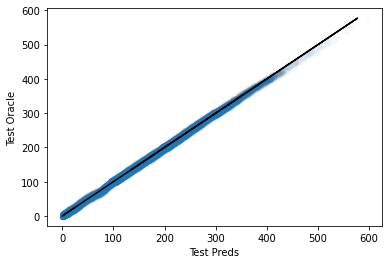

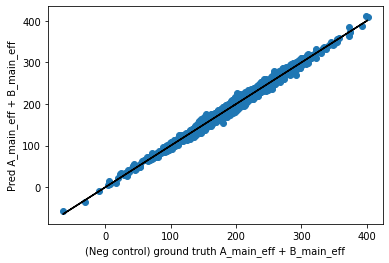

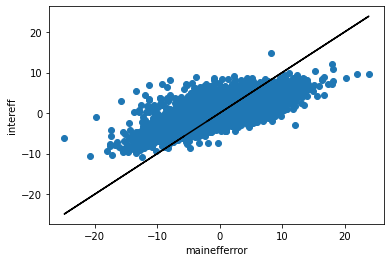

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed200_bihfz.h5
overall test loss -624.134168889289
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed200_bihfz.h5


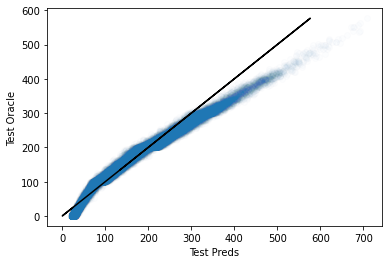

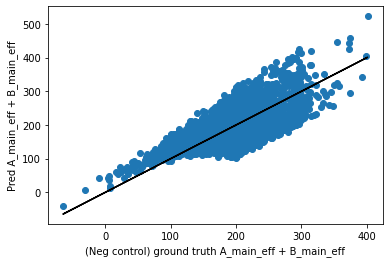

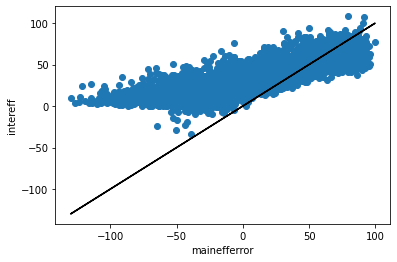

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed200_fxrui.h5
overall test loss -626.7473527944179
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed200_fxrui.h5


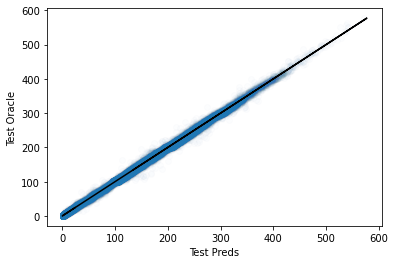

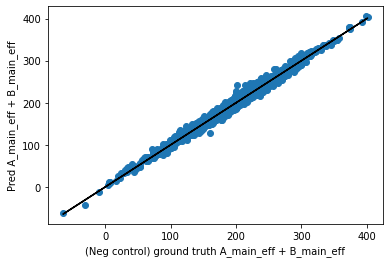

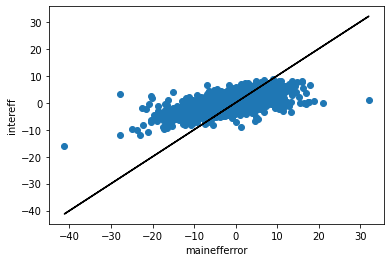

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed200_fhpbi.h5
overall test loss -626.7717723195939
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed200_fhpbi.h5


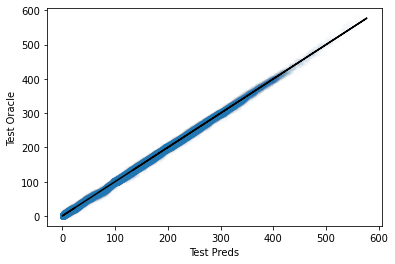

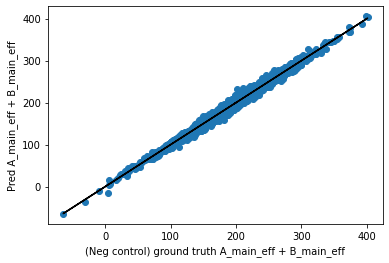

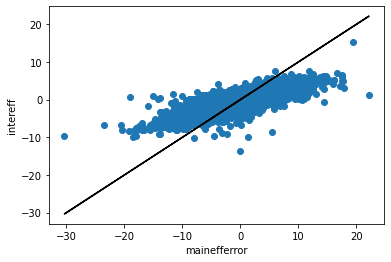

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed200_sqdbm.h5
overall test loss -624.1506655230379
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed200_sqdbm.h5


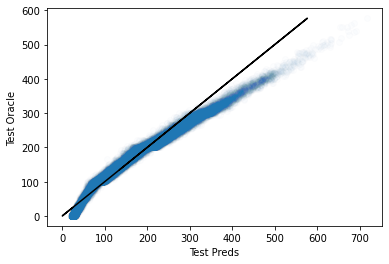

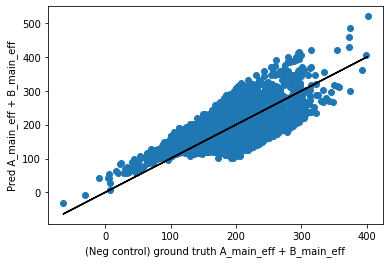

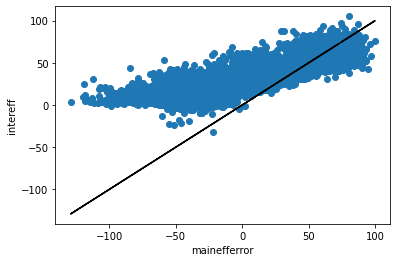

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed200_cmmyx.h5
overall test loss -626.7904972451471
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed200_cmmyx.h5


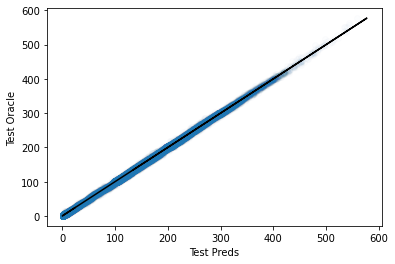

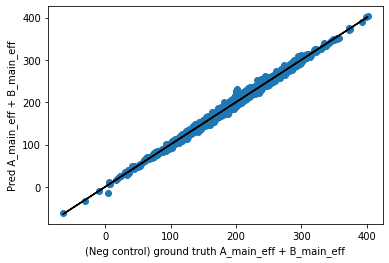

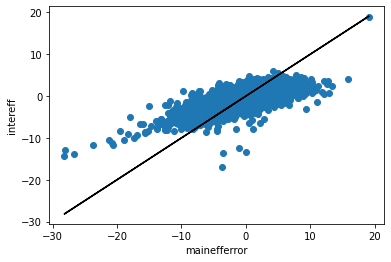

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed200_plosl.h5
overall test loss -626.755629765973
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed200_plosl.h5


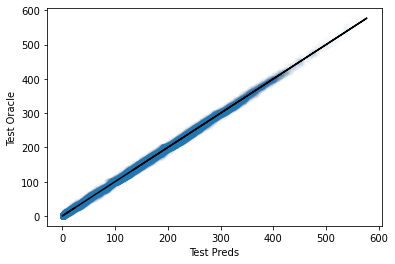

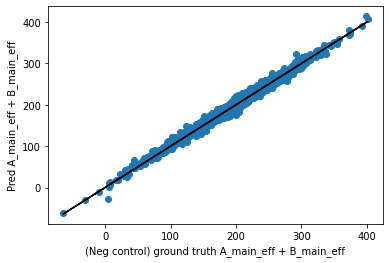

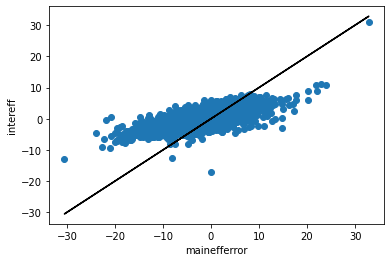

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed300_giyhi.h5
overall test loss -624.0842389805413
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed300_giyhi.h5


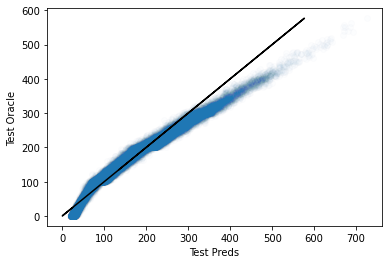

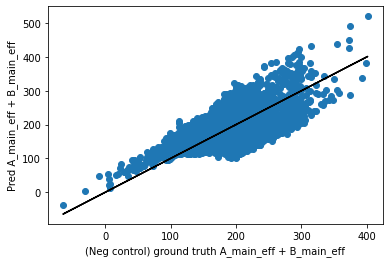

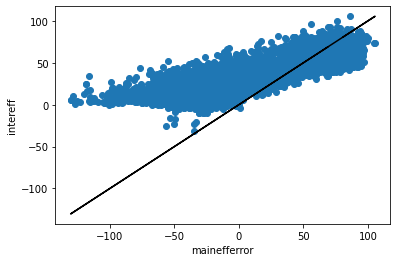

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed300_pbhsj.h5
overall test loss -626.7656683698277
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed300_pbhsj.h5


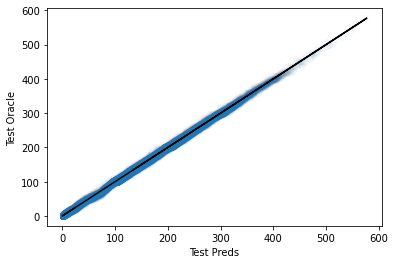

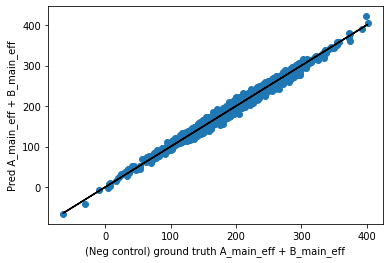

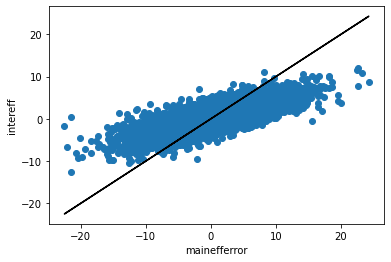

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed300_umbcx.h5
overall test loss -626.7779125189963
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed300_umbcx.h5


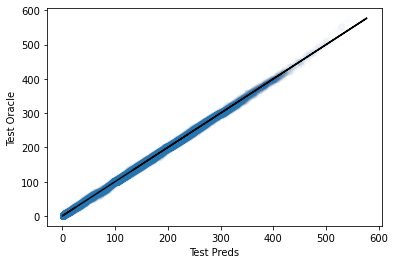

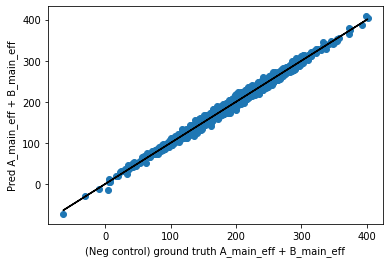

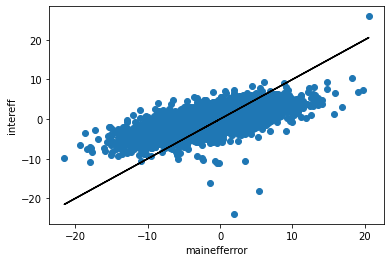

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed300_fmqxy.h5
overall test loss -624.0925986458635
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed300_fmqxy.h5


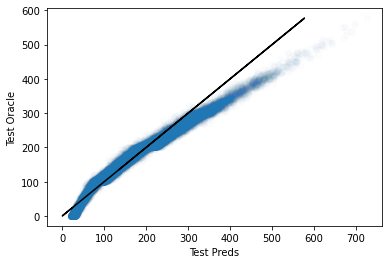

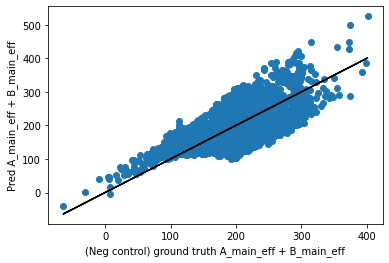

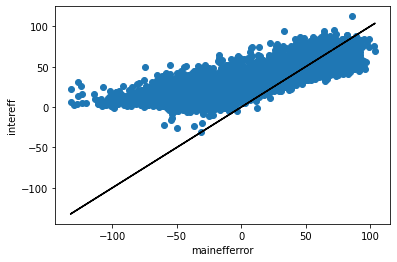

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed300_ehvbn.h5
overall test loss -626.7064066107575
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed300_ehvbn.h5


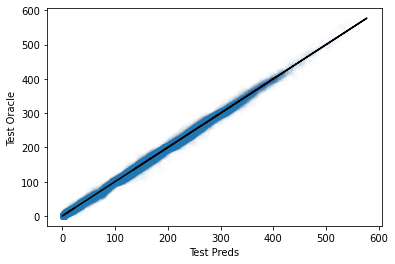

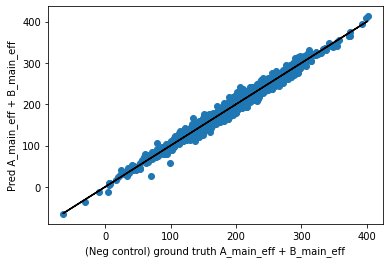

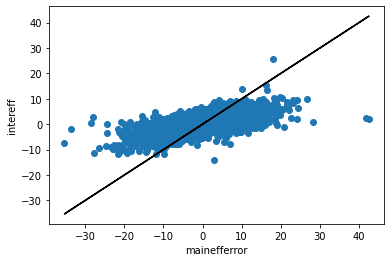

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed300_umhto.h5
overall test loss -626.7551549496526
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed300_umhto.h5


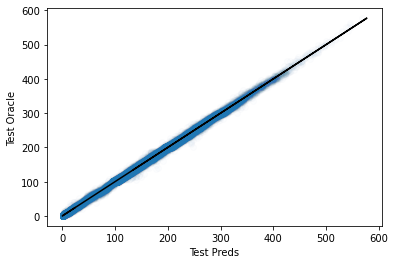

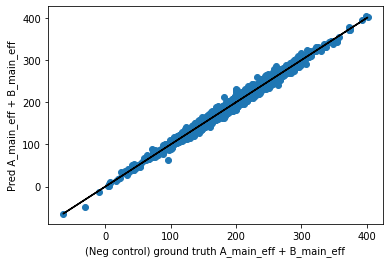

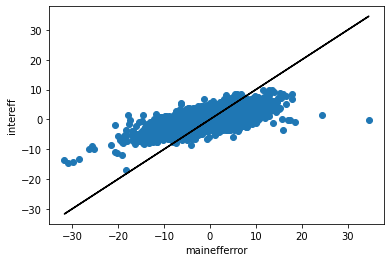

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed300_juibt.h5
overall test loss -624.1798010929871
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed300_juibt.h5


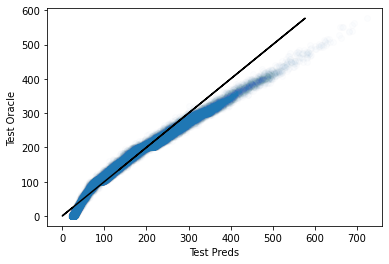

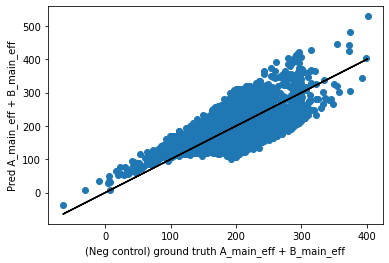

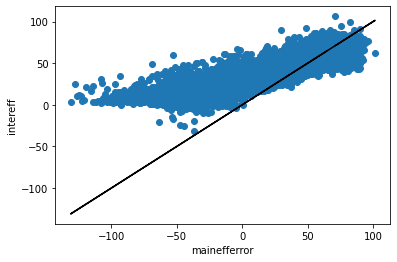

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed300_ydzzn.h5
overall test loss -626.759177279723
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed300_ydzzn.h5


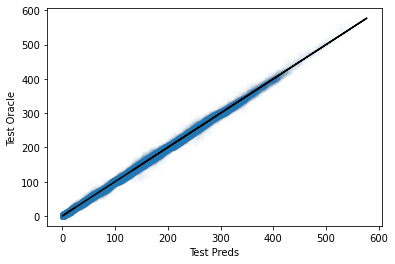

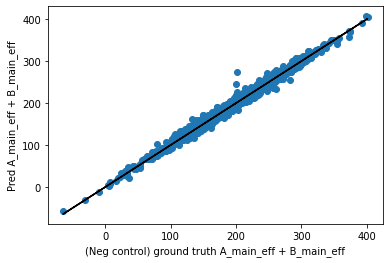

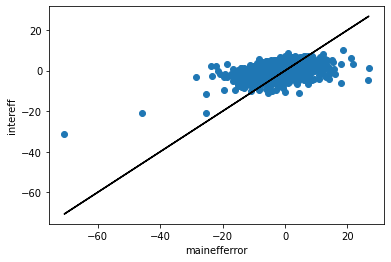

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed300_twddp.h5
overall test loss -626.7981535605949
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed300_twddp.h5


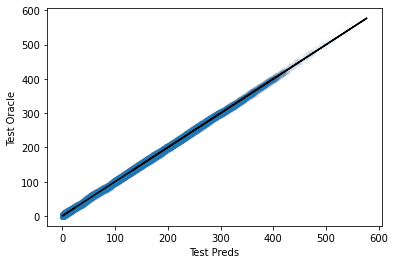

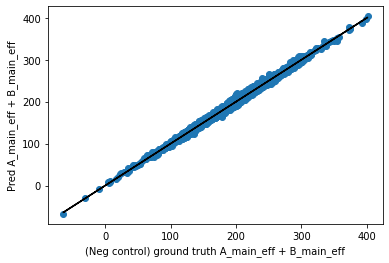

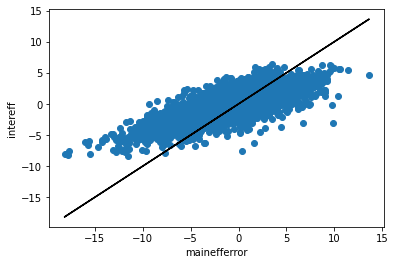

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed400_rrtmx.h5
overall test loss -623.8741234522438
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed400_rrtmx.h5


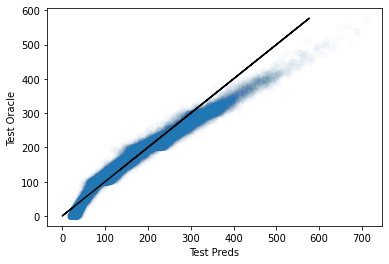

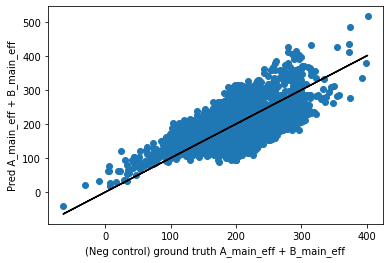

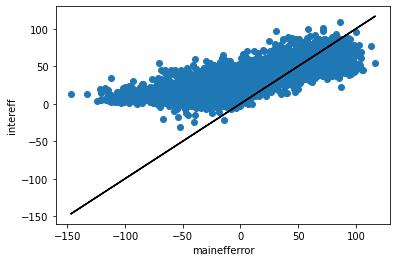

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed400_klhqe.h5
overall test loss -626.736105727604
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed400_klhqe.h5


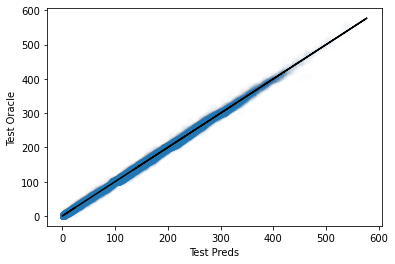

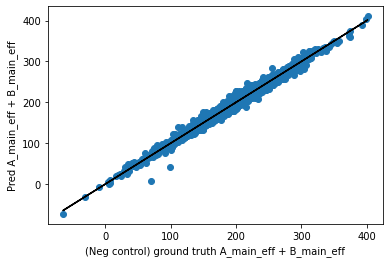

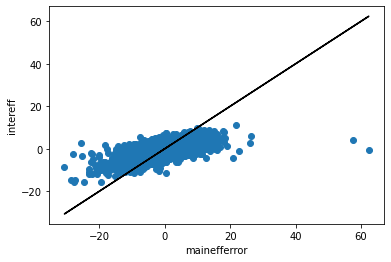

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed400_hctws.h5
overall test loss -626.7467402915166
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed400_hctws.h5


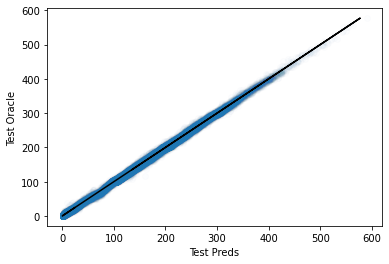

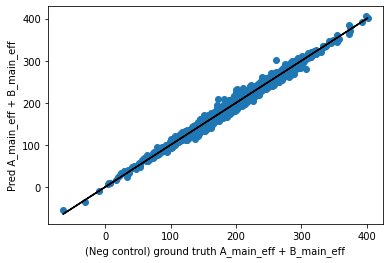

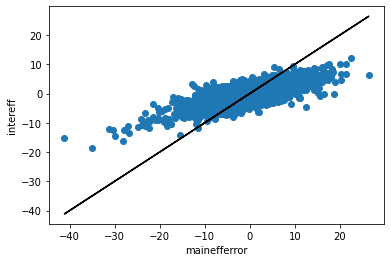

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed400_hdntv.h5
overall test loss -623.9351991930723
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed400_hdntv.h5


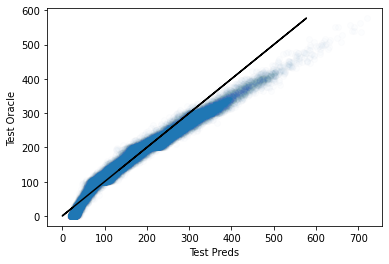

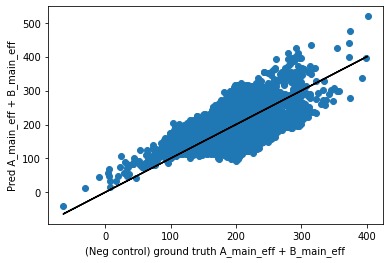

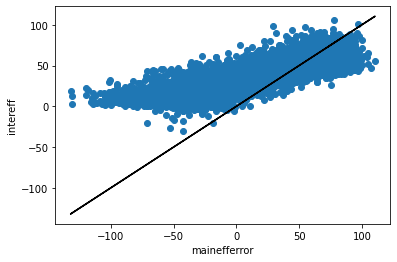

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed400_onwci.h5
overall test loss -626.7586971517859
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed400_onwci.h5


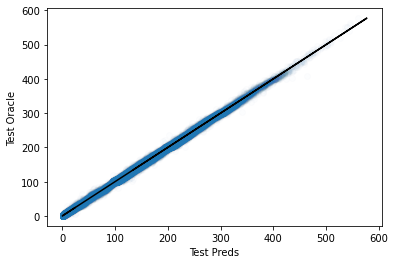

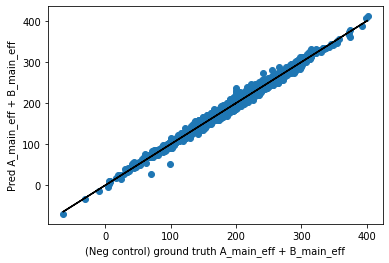

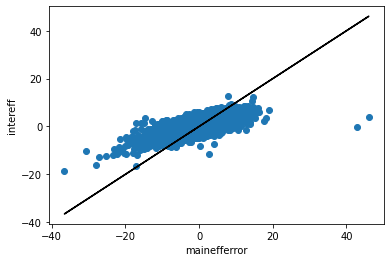

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed400_egnrs.h5
overall test loss -626.7693950053233
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed400_egnrs.h5


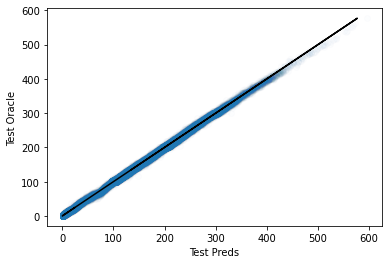

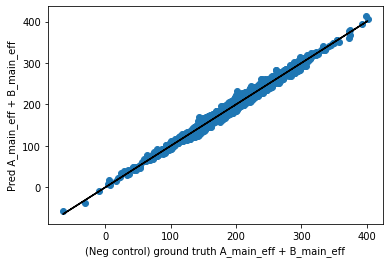

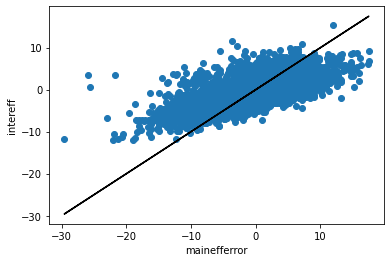

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed400_bsmim.h5
overall test loss -624.0662078434849
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed400_bsmim.h5


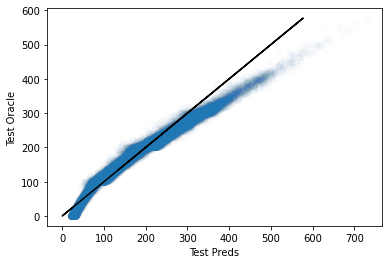

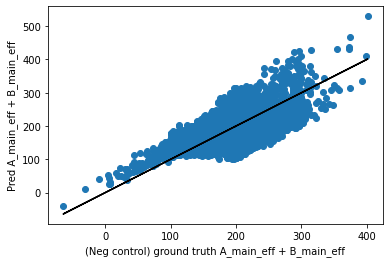

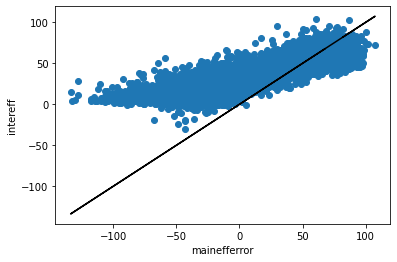

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed400_ljhxs.h5
overall test loss -626.8012559890195
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed400_ljhxs.h5


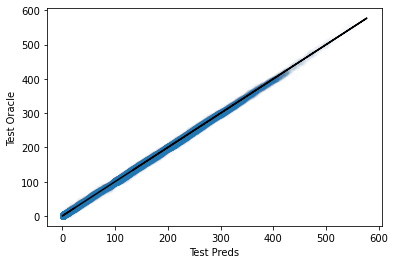

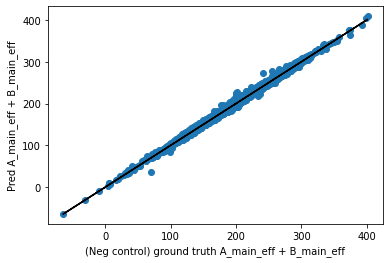

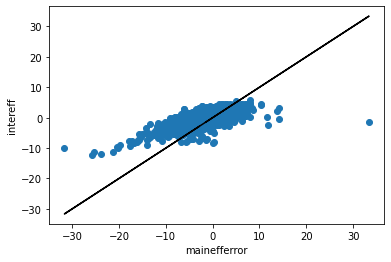

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed400_ociwk.h5
overall test loss -626.7772546978767
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed400_ociwk.h5


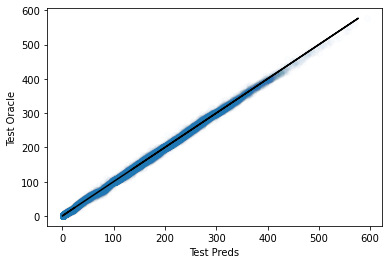

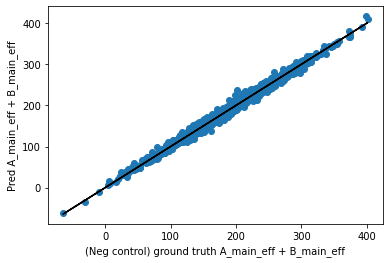

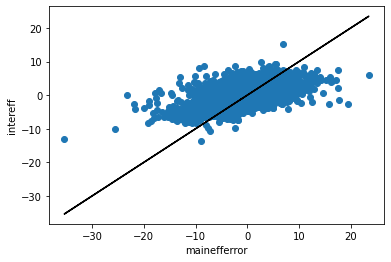

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed500_guxmk.h5
overall test loss -624.1160178161049
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed500_guxmk.h5


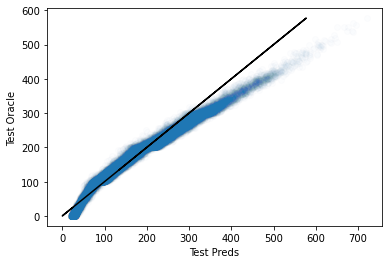

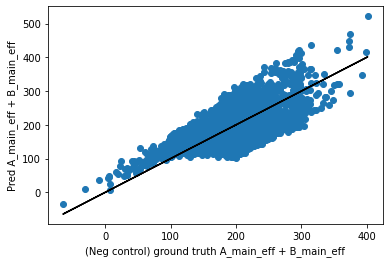

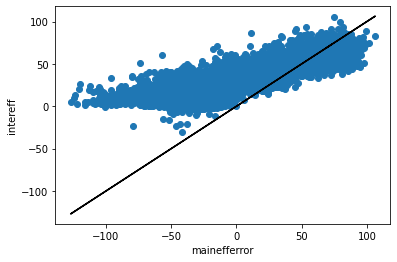

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed500_xmxvx.h5
overall test loss -626.744107232188
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed500_xmxvx.h5


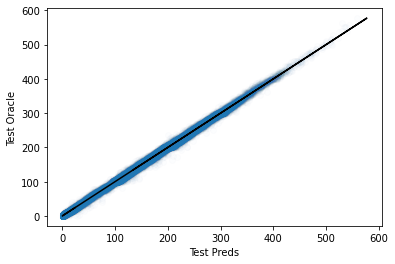

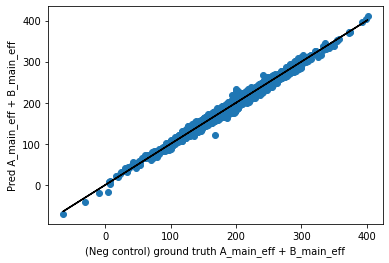

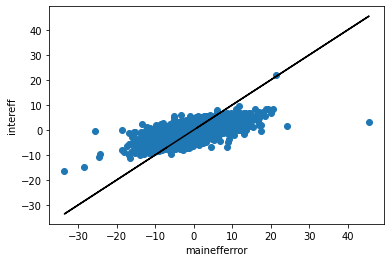

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed500_xnkrd.h5
overall test loss -626.7496534470788
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed500_xnkrd.h5


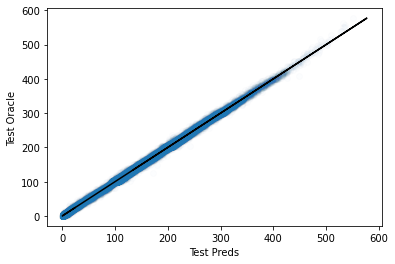

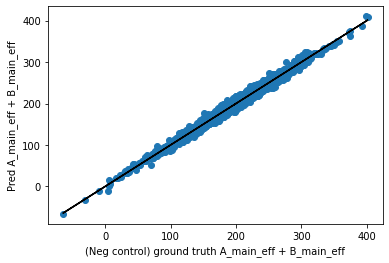

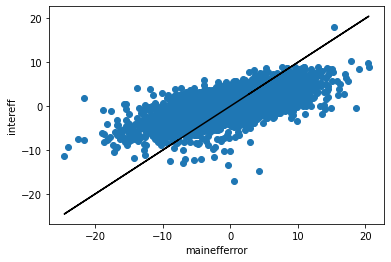

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed500_wbntp.h5
overall test loss -624.1124110631323
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed500_wbntp.h5


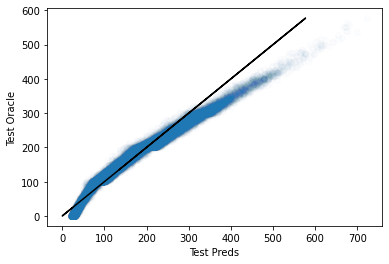

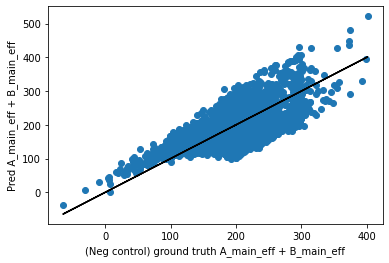

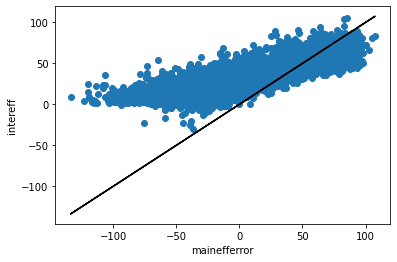

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed500_kiyug.h5
overall test loss -626.7826915003382
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed500_kiyug.h5


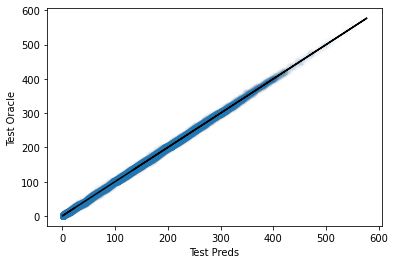

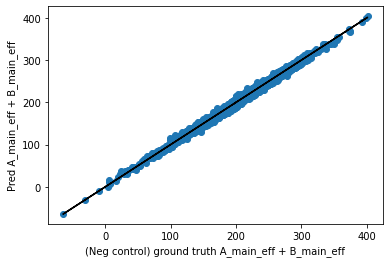

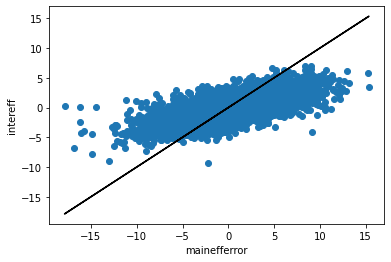

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed500_pczyj.h5
overall test loss -626.7289483456007
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed500_pczyj.h5


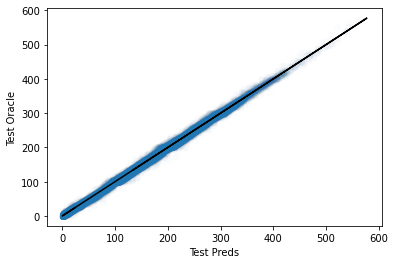

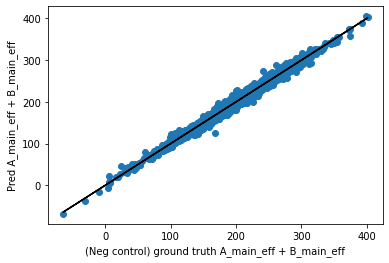

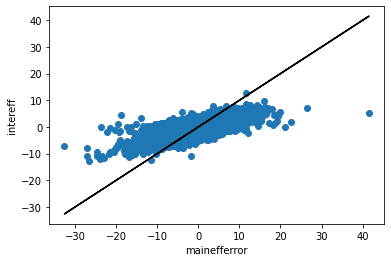

On model model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed500_gpagt.h5
overall test loss -624.1246994769716
model_preds/negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed500_gpagt.h5


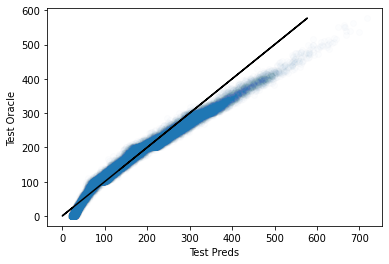

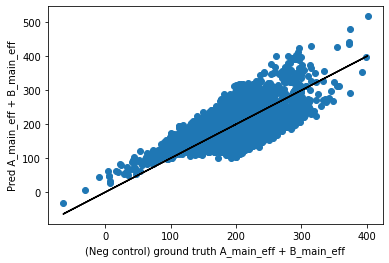

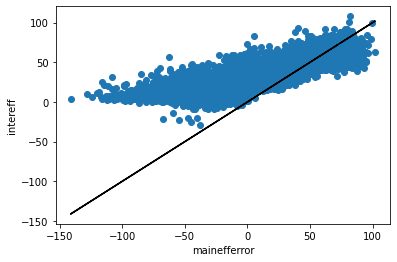

On model model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed500_fsada.h5
overall test loss -626.8013415479327
model_preds/negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed500_fsada.h5


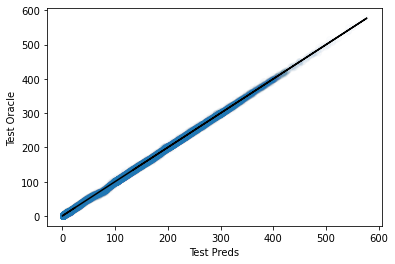

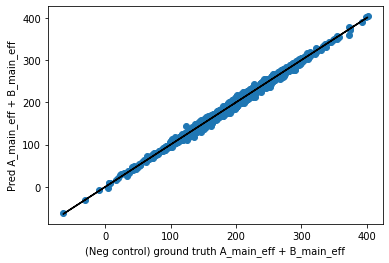

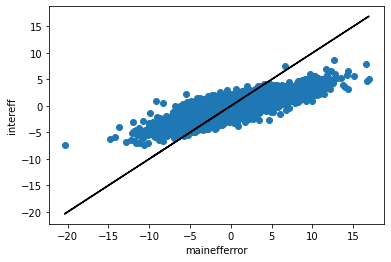

On model model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed500_rgimu.h5
overall test loss -626.7646141044756
model_preds/negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed500_rgimu.h5


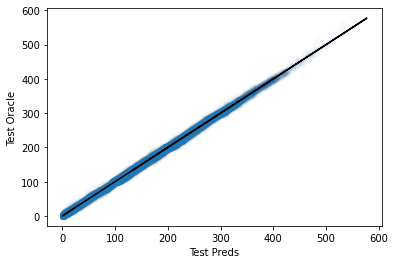

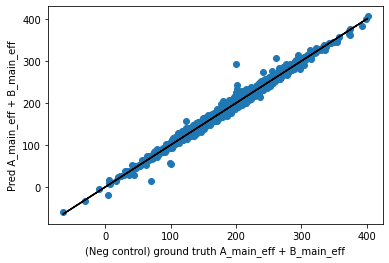

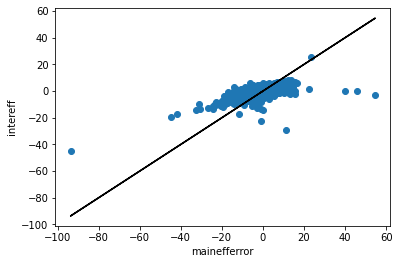

On model model_preds/poscontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed100_doaqv.h5
overall test loss -516.0481195194429
On model model_preds/poscontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed100_wwnus.h5
overall test loss -516.0372001933587
On model model_preds/poscontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed100_lszqy.h5
overall test loss -514.7028302075481
On model model_preds/poscontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed100_jyluo.h5
overall test loss -516.0794363247302
On model model_preds/poscontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed100_vlqcx.h5
overall test loss -516.0879389357546
On model model_preds/poscontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed200_cbulq.h5
overall test loss -514.647951003995
On model model_preds/poscontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed200_lsnmc.h5
overall test loss -516.0741926152025
On model model_preds/poscontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed200_ejwnt.h5
overall tes

In [137]:
import keras
from keras.models import load_model
from collections import OrderedDict

def run_analysis_on_multiple_models(
    modelpredsfiles,
    all_test_labels, all_test_oracle,
    test_toanalyze_labels,
    train_toanalyze_labels,
    shuff_toanalyze_oraclepreds):
  results = OrderedDict()
  for modelpredsfile in modelpredsfiles:
    print("On model", modelpredsfile)
    if ("rescalepoisson" in modelpredsfile):
      lossfunc = rescalepoisson_loss
      valthresh = 1e-7
    elif ("anscombemse" in modelpredsfile):
      lossfunc = anscombemse_loss
      valthresh = -3.0/8
    else:
      raise RuntimeError("Specify loss to use for",modelpredsfile)

    interaction_analysis = perform_interaction_analysis(
      modelpredsfile=modelpredsfile,
      all_test_labels=all_test_labels,
      all_test_oracle=all_test_oracle,
      test_toanalyze_labels=test_toanalyze_labels,
      train_toanalyze_labels=train_toanalyze_labels,
      shuff_toanalyze_oraclepreds=shuff_toanalyze_oraclepreds,
      lossfunc=lossfunc, valthresh=valthresh)
    results[modelpredsfile.split("/")[-1]] = interaction_analysis
  return results

negcontrol_results = run_analysis_on_multiple_models(
    modelpredsfiles=negcontrol_modelpredsfiles,
    all_test_labels=test_neg_labels,
    all_test_oracle=test_neg_oracle,
    test_toanalyze_labels=test_toanalyze_orig_neg_labels,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_neg
    )

poscontrol_results = run_analysis_on_multiple_models(
    modelpredsfiles=poscontrol_modelpredsfiles,
    all_test_labels=test_pos_labels,
    all_test_oracle=test_pos_oracle,
    test_toanalyze_labels=test_toanalyze_orig_pos_labels,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_pos)

In [138]:
failed_paired_wilcoxon_negcontrol = [x for x in negcontrol_results.keys() if
                                     negcontrol_results[x].test_toanalyze_lossimprovement_wilcoxon.pvalue < 0.05]
print("\n".join(sorted(str(x) for x in failed_paired_wilcoxon_negcontrol)))
print(len(failed_paired_wilcoxon_negcontrol))

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed100_mtaow.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed200_plosl.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed300_twddp.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed400_ociwk.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed500_rgimu.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed100_nfwlk.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed200_oqbpf.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed300_umbcx.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed400_hctws.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed500_xnkrd.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed100_koolv.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed200_fhpbi.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed300_umhto.h5
negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed400_egnrs.h5
negcontrol_model-rescalep

In [139]:
failed_mannwhit_negcontrol = [(x,negcontrol_results[x].test_toanalyze_lossimprovement_mannwhit.pvalue)
                              for x in negcontrol_results.keys() if
                              negcontrol_results[x].test_toanalyze_lossimprovement_mannwhit.pvalue < 0.05]
print("\n".join(sorted(str(x) for x in failed_mannwhit_negcontrol)))
print(len(failed_mannwhit_negcontrol))


0


In [140]:
import scipy.stats

#need scatterplot of predicted main eff and predicted inter eff on
# negative control data

negcontrol_main_eff_vec = []
negcontrol_main_eff_error_vec = []
negcontrol_inter_eff_vec = []

negcontrol_test_intereff_mag_mean = []
negcontrol_test_intereff_mag_stderr = []
negcontrol_shuff_intereff_mag_mean = []
negcontrol_shuff_intereff_mag_stderr = []

poscontrol_test_intereff_mag_mean = []
poscontrol_test_intereff_mag_stderr = []
poscontrol_shuff_intereff_mag_mean = []
poscontrol_shuff_intereff_mag_stderr = []

negcontrol_test_lossimp_mean = []
negcontrol_test_lossimp_median = []
negcontrol_test_lossimp_stderr = []
negcontrol_controltest_lossimp_mean = []
negcontrol_controltest_lossimp_median = []
negcontrol_controltest_lossimp_stderr = []

negcontrol_train_lossimp_mean = []
negcontrol_train_lossimp_median = []
negcontrol_train_lossimp_stderr = []
negcontrol_controltrain_lossimp_mean = []
negcontrol_controltrain_lossimp_median = []
negcontrol_controltrain_lossimp_stderr = []

poscontrol_test_lossimp_mean = []
poscontrol_test_lossimp_median = []
poscontrol_test_lossimp_stderr = []
poscontrol_controltest_lossimp_mean = []
poscontrol_controltest_lossimp_median = []
poscontrol_controltest_lossimp_stderr = []

negcontrol_mainvintereff_corrs = []

negcontrol_modelorder = []
poscontrol_modelorder = []

for (isposcontrol, results) in [(True, poscontrol_results),
                                (False, negcontrol_results)]:
  for modelfile, single_model_result in results.items():
    if (isposcontrol):
      poscontrol_modelorder.append(modelfile)
    else:
      negcontrol_modelorder.append(modelfile)

    test_main_effs = (
    single_model_result.test_toanalyze_interactioneffectdata.A_main_eff
    + single_model_result.test_toanalyze_interactioneffectdata.B_main_eff)

    test_intereff = (
        single_model_result.test_toanalyze_interactioneffectdata.inter_eff)
    shuff_intereff = (
        single_model_result.shuff_toanalyze_interactioneffectdata.inter_eff)
    
    mag_test_intereff = np.abs(test_intereff)
    mag_shuff_intereff = np.abs(shuff_intereff)

    if (isposcontrol==False):
      negcontrol_test_intereff_mag_mean.append(np.mean(mag_test_intereff))
      negcontrol_shuff_intereff_mag_mean.append(np.mean(mag_shuff_intereff))
      negcontrol_test_intereff_mag_stderr.append(scipy.stats.sem(mag_test_intereff))
      negcontrol_shuff_intereff_mag_stderr.append(scipy.stats.sem(mag_shuff_intereff))
    else:
      poscontrol_test_intereff_mag_mean.append(np.mean(mag_test_intereff))
      poscontrol_shuff_intereff_mag_mean.append(np.mean(mag_shuff_intereff))
      poscontrol_test_intereff_mag_stderr.append(scipy.stats.sem(mag_test_intereff))
      poscontrol_shuff_intereff_mag_stderr.append(scipy.stats.sem(mag_shuff_intereff))
      
    test_main_eff_error = test_toanalyze_groundtruth_neg_maineff - test_main_effs
    
    if (isposcontrol==False):
      negcontrol_main_eff_vec.extend(test_main_effs)
      negcontrol_main_eff_error_vec.extend(test_main_eff_error)
      negcontrol_inter_eff_vec.extend(test_intereff)
      negcontrol_mainvintereff_corrs.append(
          scipy.stats.pearsonr(test_main_effs, test_intereff)[0])

    if (isposcontrol==False):
      negcontrol_test_lossimp_mean.append(np.mean(
        single_model_result.test_toanalyze_lossimprovement))
      negcontrol_test_lossimp_median.append(np.median(
          single_model_result.test_toanalyze_lossimprovement))
      negcontrol_test_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.test_toanalyze_lossimprovement))

      negcontrol_train_lossimp_mean.append(np.mean(
        single_model_result.train_toanalyze_lossimprovement))      
      negcontrol_train_lossimp_median.append(np.median(
          single_model_result.train_toanalyze_lossimprovement))  
      negcontrol_train_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.train_toanalyze_lossimprovement))

      negcontrol_controltest_lossimp_mean.append(np.mean(
        single_model_result.controltest_toanalyze_lossimprovement))
      negcontrol_controltest_lossimp_median.append(np.median(
        single_model_result.controltest_toanalyze_lossimprovement))
      negcontrol_controltest_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltest_toanalyze_lossimprovement))
      
      negcontrol_controltrain_lossimp_mean.append(np.mean(
        single_model_result.controltrain_toanalyze_lossimprovement))
      negcontrol_controltrain_lossimp_median.append(np.median(
        single_model_result.controltrain_toanalyze_lossimprovement))
      negcontrol_controltrain_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltrain_toanalyze_lossimprovement))

    else:
      poscontrol_test_lossimp_mean.append(np.mean(
        single_model_result.test_toanalyze_lossimprovement))
      poscontrol_test_lossimp_median.append(np.median(
          single_model_result.test_toanalyze_lossimprovement))
      poscontrol_test_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.test_toanalyze_lossimprovement))  
      
      poscontrol_controltest_lossimp_mean.append(np.mean(
        single_model_result.controltest_toanalyze_lossimprovement))
      poscontrol_controltest_lossimp_median.append(np.median(
        single_model_result.controltest_toanalyze_lossimprovement))
      poscontrol_controltest_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltest_toanalyze_lossimprovement))

In [141]:
def xyaxis_scatterplot(x,y, highlight=[], highlight_color='red', density=False,
                       withxeqy=False, **kwargs):
  if (withxeqy):
    all_vals = sorted(list(x)+list(y)+[0] )
    plt.plot(all_vals, all_vals, color="black")
    plt.plot([0 for v in all_vals], all_vals, color="black", linestyle="--")
    plt.plot(all_vals, [0 for v in all_vals], color="black", linestyle="--")
  else:
    plt.plot([0 for v in y]+[0], sorted(list(y)+[0]), color="black", linestyle="--")
    plt.plot(sorted(list(x)+[0]), [0 for v in x]+[0], color="black", linestyle="--")
  if ('xerr' in kwargs or 'yerr' in kwargs):
    plt.errorbar(x,y,**kwargs)
  else:
    if (density==False):
      plt.scatter(x,y,**kwargs)
    else:
      # Calculate the point density
      xy = np.vstack([x,y])
      from scipy.stats import gaussian_kde
      z = gaussian_kde(xy)(xy)
      plt.scatter(x,y,c=z, edgecolor='', **kwargs)
  if ('xerr' in kwargs or 'yerr' in kwargs):
    plt.errorbar([x[i] for i in highlight],
                 [y[i] for i in highlight],
                 fmt=kwargs['fmt'],
                 xerr=[kwargs['xerr'][i] if 'xerr' in kwargs else 0
                       for i in highlight],
                 yerr=[kwargs['yerr'][i] for i in highlight],
                 color=highlight_color)
  else:
    plt.scatter([x[i] for i in highlight],
                [y[i] for i in highlight], color=highlight_color)


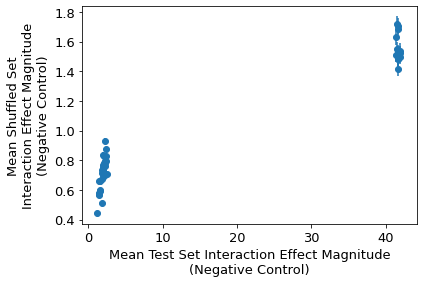

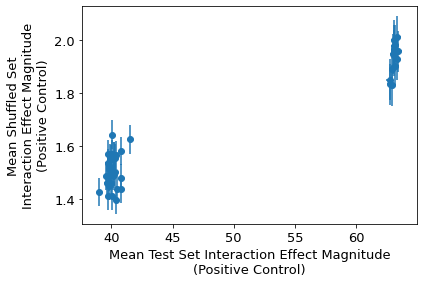

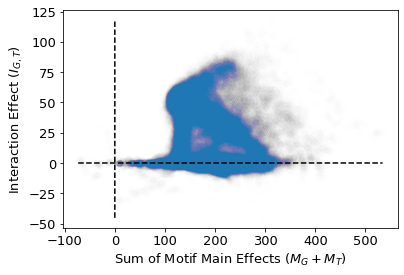

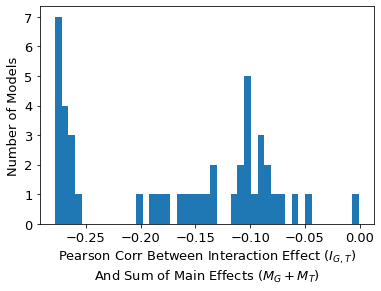

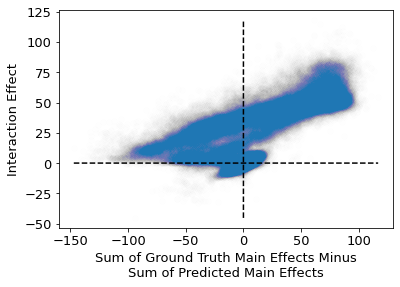

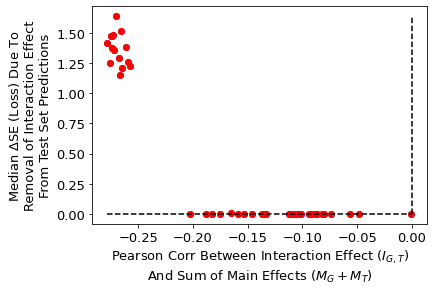

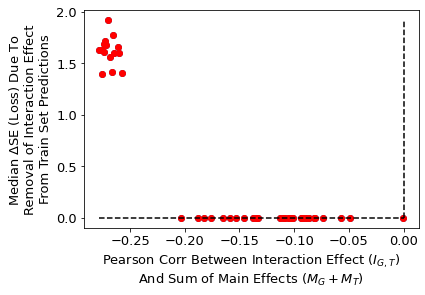

In [142]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rc('font', size=13)

#plt.plot(test_intereff_mag_mean, test_intereff_mag_mean, color="black")
plt.errorbar(x=negcontrol_test_intereff_mag_mean,
             y=negcontrol_shuff_intereff_mag_mean,
             xerr=negcontrol_test_intereff_mag_stderr,
             yerr=negcontrol_shuff_intereff_mag_stderr,
             fmt='o')
plt.xlabel("Mean Test Set Interaction Effect Magnitude\n(Negative Control)")
plt.ylabel("Mean Shuffled Set\nInteraction Effect Magnitude\n(Negative Control)")
plt.show()

plt.errorbar(x=poscontrol_test_intereff_mag_mean,
             y=poscontrol_shuff_intereff_mag_mean,
             xerr=poscontrol_test_intereff_mag_stderr,
             yerr=poscontrol_shuff_intereff_mag_stderr,
             fmt='o')
plt.xlabel("Mean Test Set Interaction Effect Magnitude\n(Positive Control)")
plt.ylabel("Mean Shuffled Set\nInteraction Effect Magnitude\n(Positive Control)")
plt.show()

xyaxis_scatterplot(negcontrol_main_eff_vec,
                   negcontrol_inter_eff_vec, density=False, alpha=0.003)
plt.xlabel(r"Sum of Motif Main Effects $(M_G + M_T)$")
plt.ylabel(r"Interaction Effect $(I_{G,T})$")
plt.show()

plt.hist(negcontrol_mainvintereff_corrs, bins=45)
plt.xlabel(r"Pearson Corr Between Interaction Effect $(I_{G,T})$"
            +"\n"+r"And Sum of Main Effects $(M_G + M_T)$")
plt.ylabel("Number of Models")
plt.show()

xyaxis_scatterplot(negcontrol_main_eff_error_vec,
                   negcontrol_inter_eff_vec, density=False, alpha=0.003)
plt.xlabel("Sum of Ground Truth Main Effects Minus"
           +"\nSum of Predicted Main Effects")
plt.ylabel("Interaction Effect")
plt.show()

xyaxis_scatterplot(negcontrol_mainvintereff_corrs,
                   negcontrol_test_lossimp_median,
                   #yerr=negcontrol_test_lossimp_stderr,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol],
                   #fmt='o'
                   )
plt.xlabel(r"Pearson Corr Between Interaction Effect $(I_{G,T})$"
            +"\n"+r"And Sum of Main Effects $(M_G + M_T)$")
plt.ylabel(r"Median $\Delta$SE (Loss) Due To "+"\n"+
           "Removal of Interaction Effect\nFrom Test Set Predictions")
plt.show()

xyaxis_scatterplot(negcontrol_mainvintereff_corrs,
                   negcontrol_train_lossimp_median,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol])
plt.xlabel(r"Pearson Corr Between Interaction Effect $(I_{G,T})$"
            +"\n"+r"And Sum of Main Effects $(M_G + M_T)$")
plt.ylabel(r"Median $\Delta$SE (Loss) Due To "+"\n"+
           "Removal of Interaction Effect\nFrom Train Set Predictions")
plt.show()

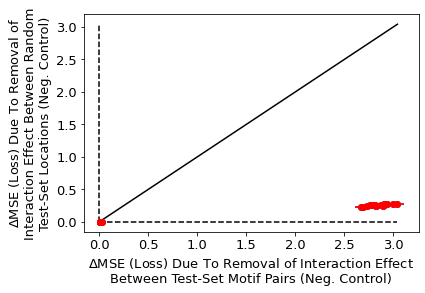

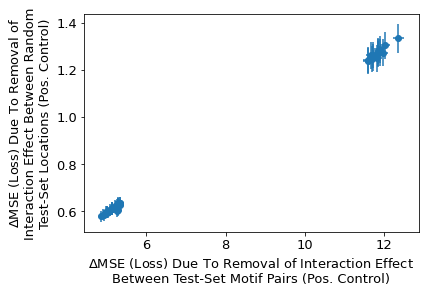

In [143]:
#MEDIAN_MULTIPLIER = 1.353

xyaxis_scatterplot(x=negcontrol_test_lossimp_mean,
                   y=negcontrol_controltest_lossimp_mean,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol],
                   xerr=negcontrol_test_lossimp_stderr,
                   yerr=negcontrol_controltest_lossimp_stderr,
                   fmt='o',
                   withxeqy=True,
                   )
plt.xlabel(r"$\Delta$MSE (Loss) Due To Removal of Interaction Effect"+"\n"+"Between Test-Set Motif Pairs (Neg. Control)")
plt.ylabel(r"$\Delta$MSE (Loss) Due To Removal of"+"\n"+"Interaction Effect Between Random"+"\n"+"Test-Set Locations (Neg. Control)")
plt.show()

plt.errorbar(x=poscontrol_test_lossimp_mean,
                   y=poscontrol_controltest_lossimp_mean,
                   xerr=poscontrol_test_lossimp_stderr,
                   yerr=poscontrol_controltest_lossimp_stderr,
                   fmt='o'
                   )
plt.xlabel(r"$\Delta$MSE (Loss) Due To Removal of Interaction Effect"+"\n"+"Between Test-Set Motif Pairs (Pos. Control)")
plt.ylabel(r"$\Delta$MSE (Loss) Due To Removal of"+"\n"+"Interaction Effect Between Random"+"\n"+"Test-Set Locations (Pos. Control)")
plt.show()

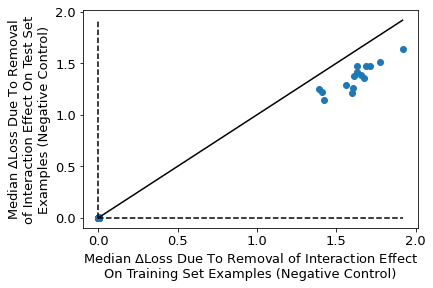

In [144]:
xyaxis_scatterplot(negcontrol_train_lossimp_median,
                   negcontrol_test_lossimp_median,
                   highlight = [],
                   #highlight=[negcontrol_modelorder.index(x)
                   #           for x in failed_paired_wilcoxon_negcontrol],
                   withxeqy=True)
plt.ylabel("Median $\Delta$Loss Due To Removal"+"\n"
           +"of Interaction Effect On Test Set\nExamples (Negative Control)")
plt.xlabel("Median $\Delta$Loss Due To "
           +"Removal of Interaction Effect\nOn Training Set Examples (Negative Control)")
plt.show()

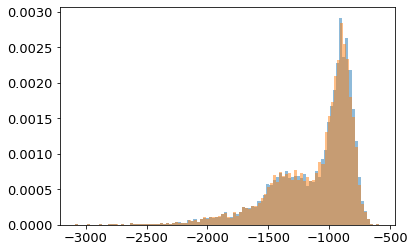

1.3846158981323242


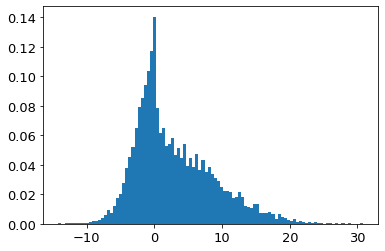

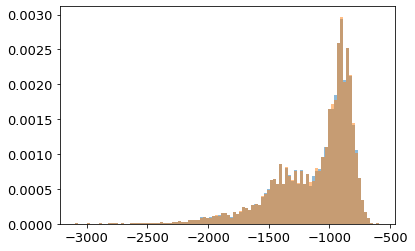

0.0036492347717285156


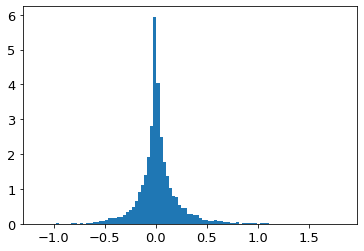

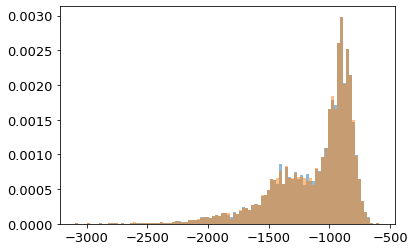

0.00394439697265625


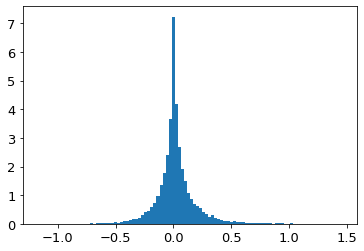

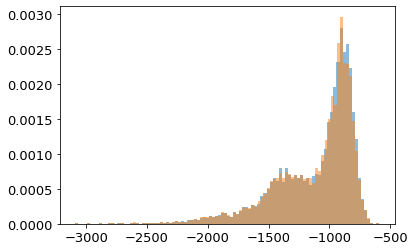

1.2217111587524414


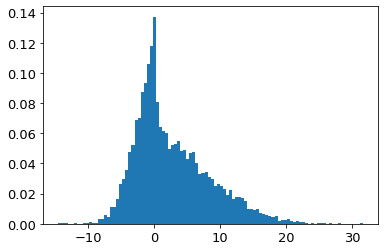

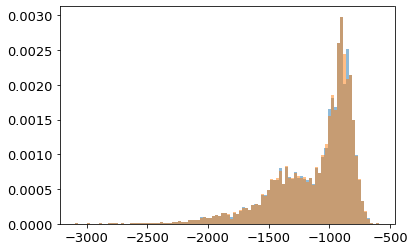

0.003746509552001953


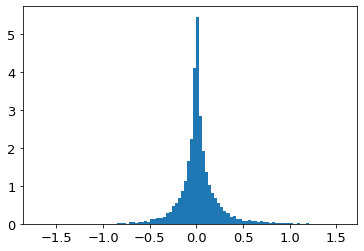

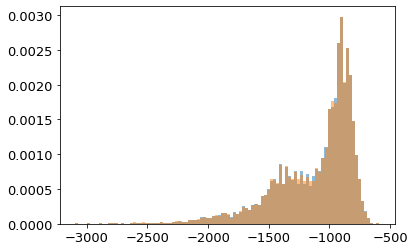

0.002777099609375


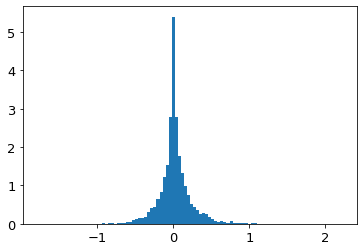

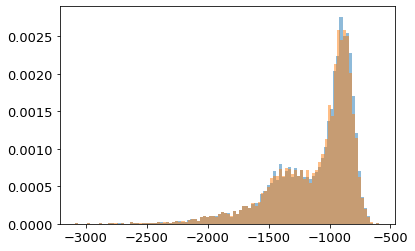

1.5162982940673828


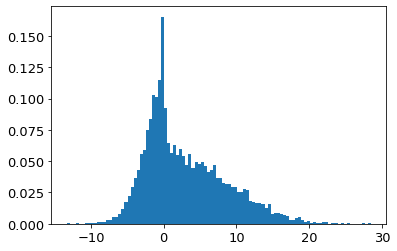

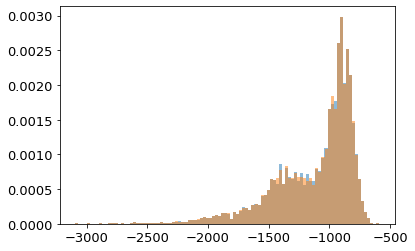

0.000904083251953125


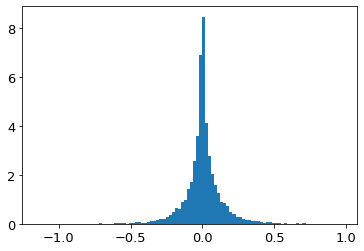

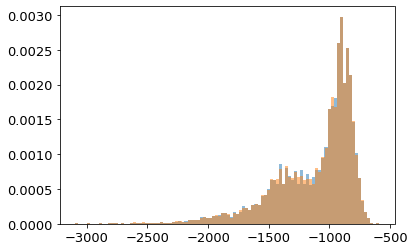

0.001018524169921875


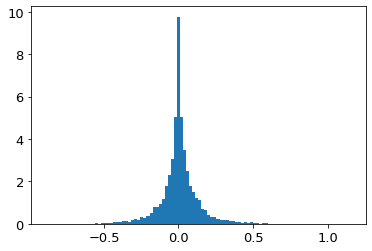

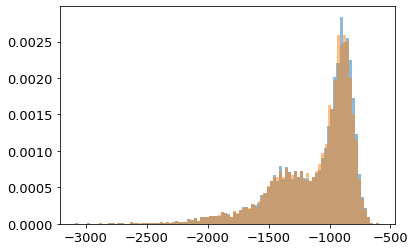

1.376871109008789


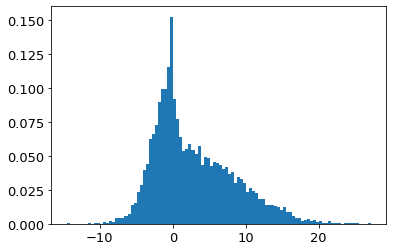

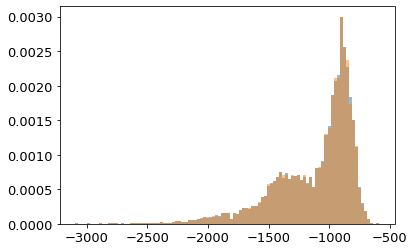

0.002823352813720703


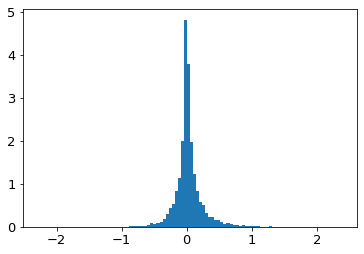

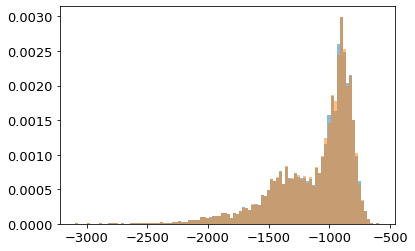

0.0020732879638671875


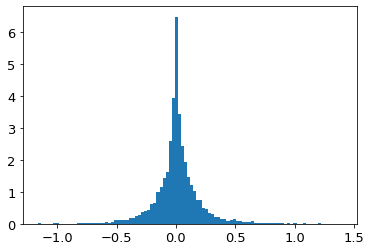

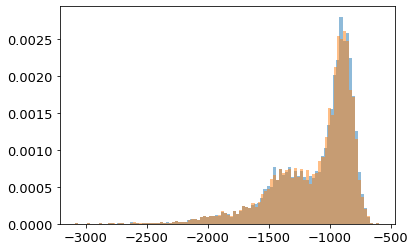

1.4124722480773926


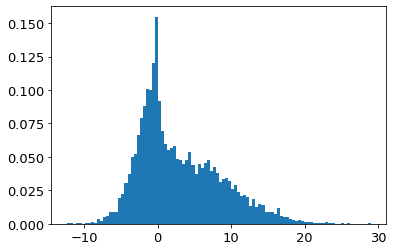

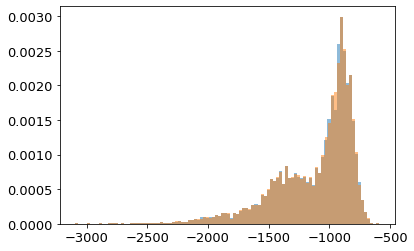

0.0021991729736328125


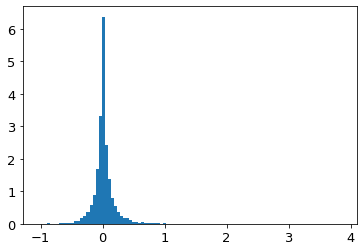

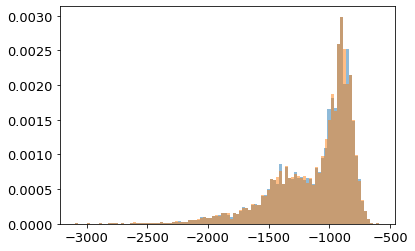

0.0026836395263671875


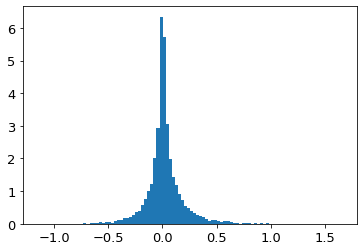

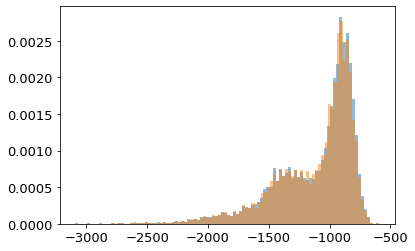

1.47332763671875


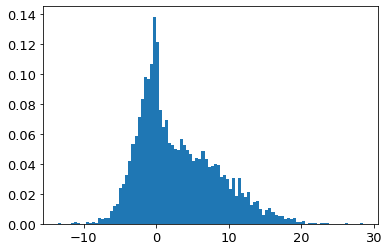

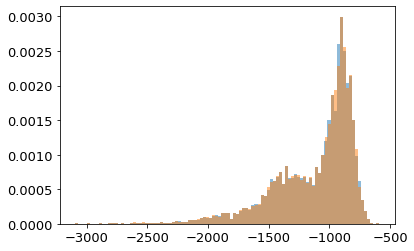

0.002826690673828125


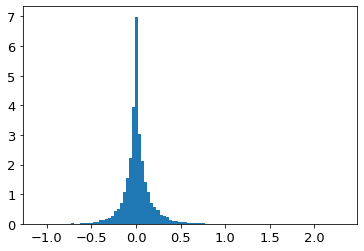

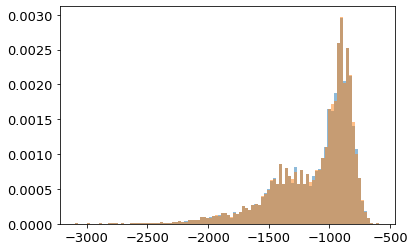

0.0015482902526855469


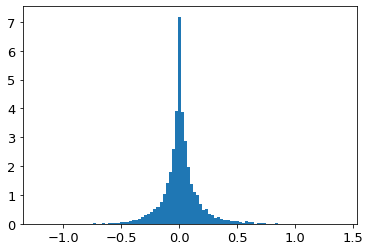

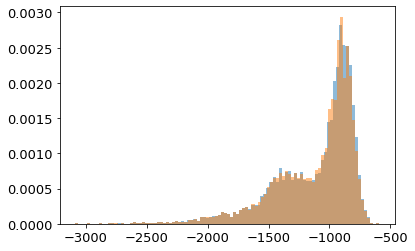

1.4789237976074219


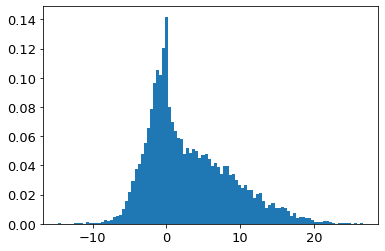

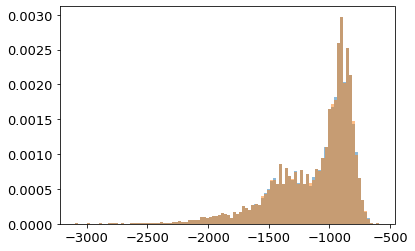

0.0030059814453125


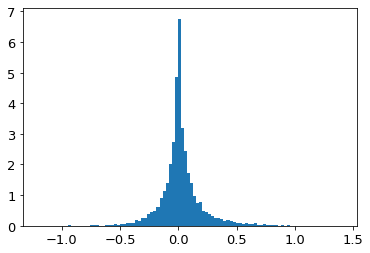

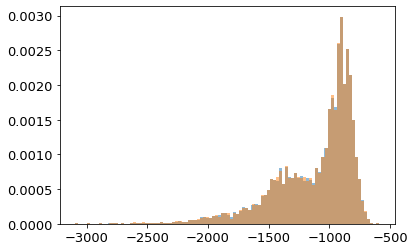

0.0030975341796875


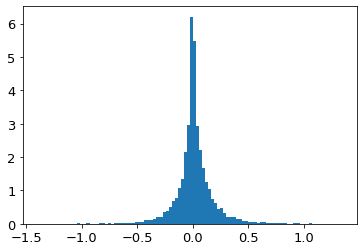

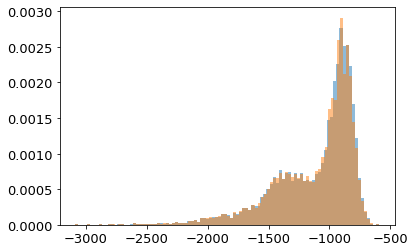

1.1471633911132812


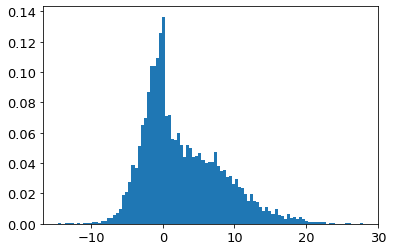

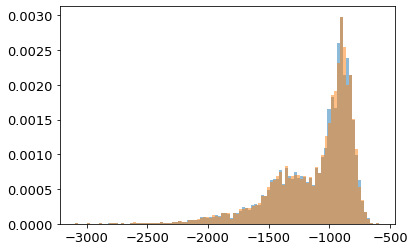

0.00377655029296875


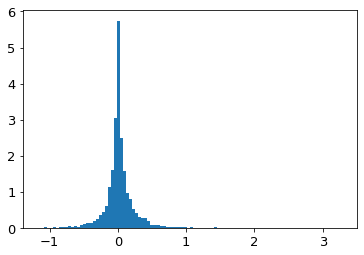

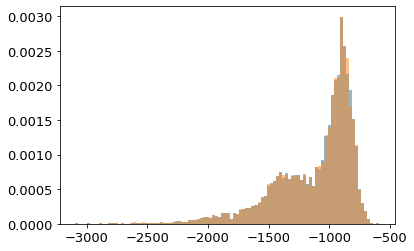

0.003704071044921875


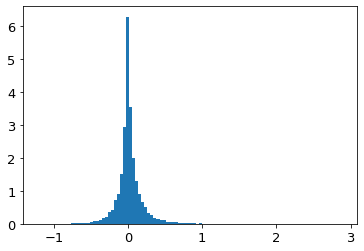

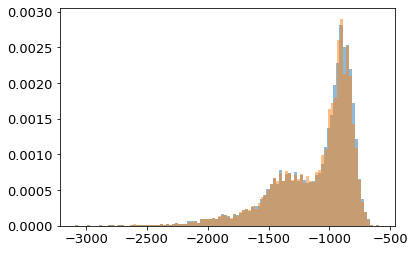

1.4765453338623047


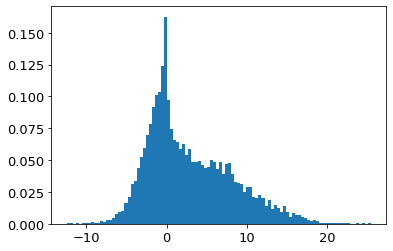

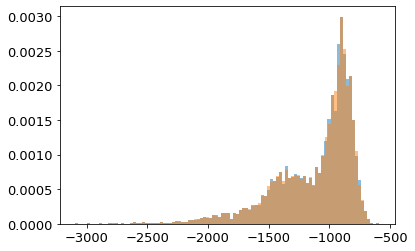

0.00128173828125


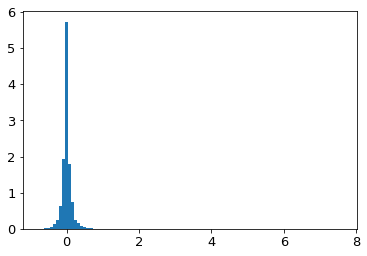

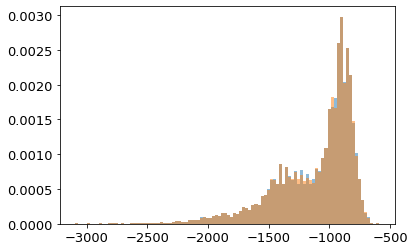

0.0006732940673828125


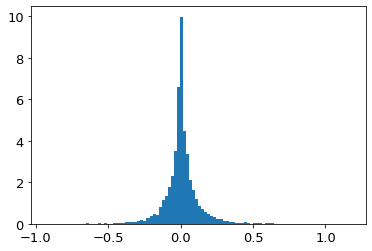

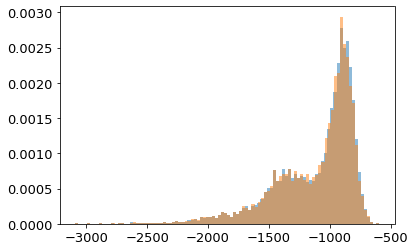

1.2565555572509766


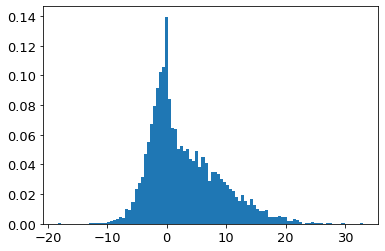

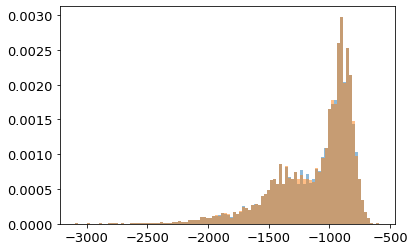

0.0051021575927734375


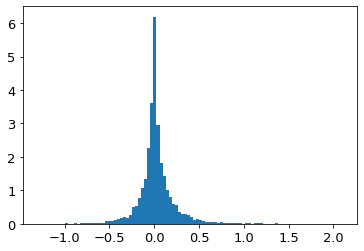

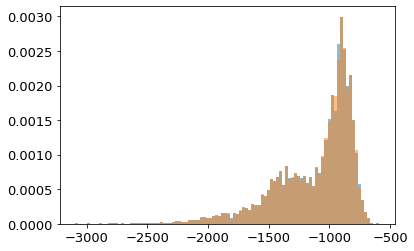

0.0037584304809570312


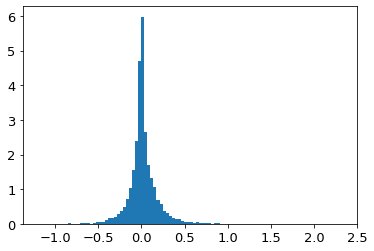

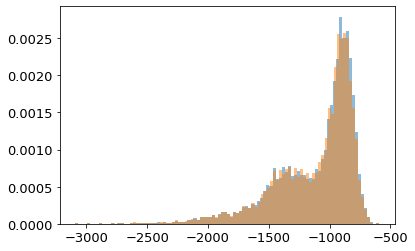

1.2101197242736816


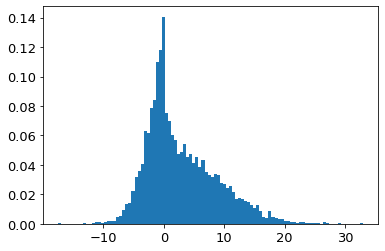

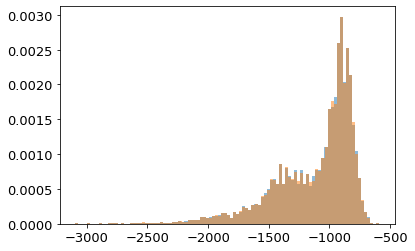

0.003090381622314453


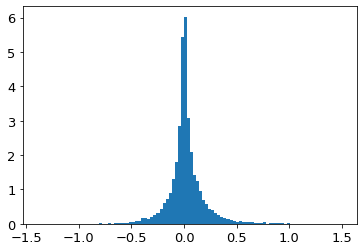

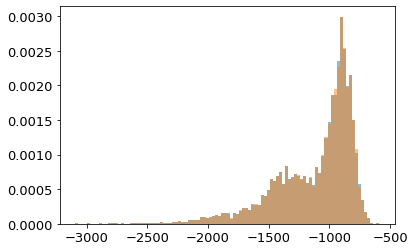

0.00263214111328125


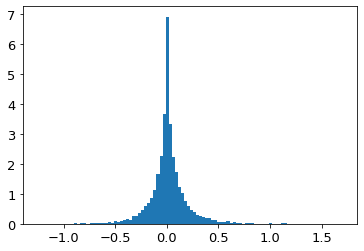

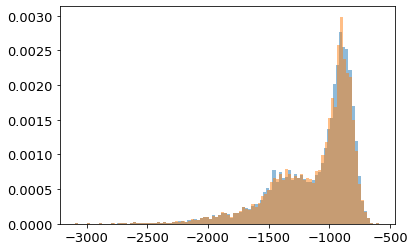

1.2941222190856934


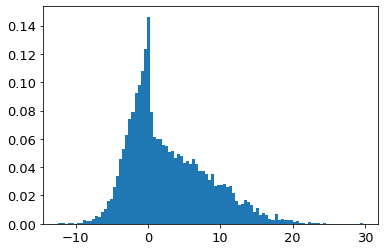

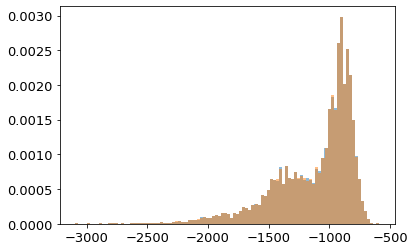

0.0005464553833007812


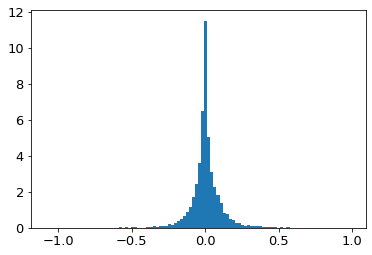

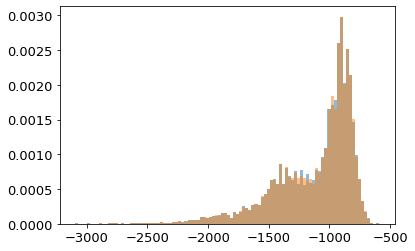

0.0016789436340332031


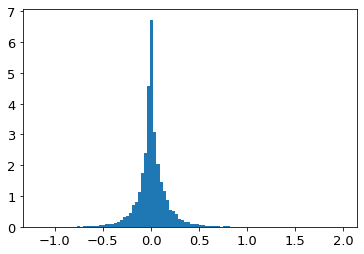

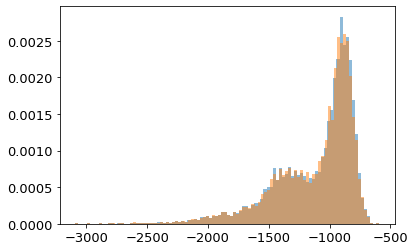

1.2541999816894531


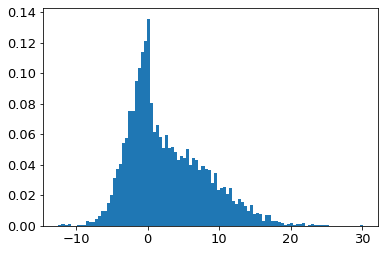

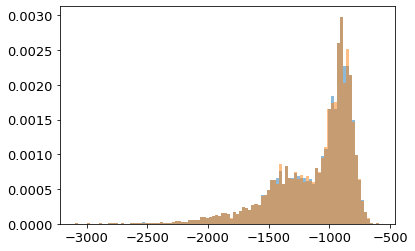

0.002861499786376953


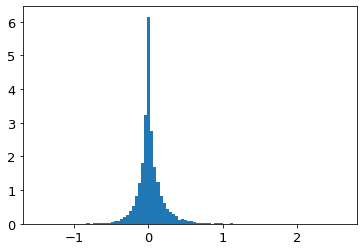

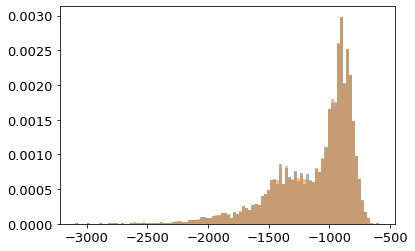

0.003829479217529297


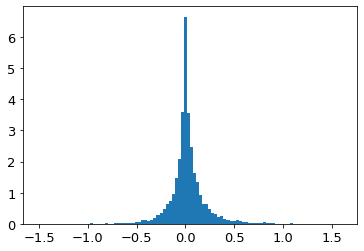

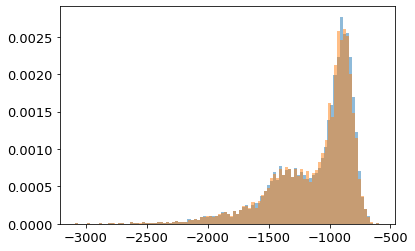

1.6370677947998047


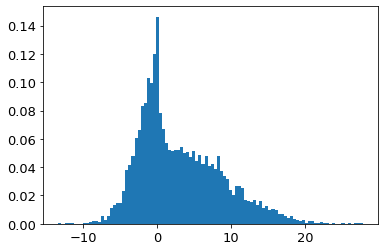

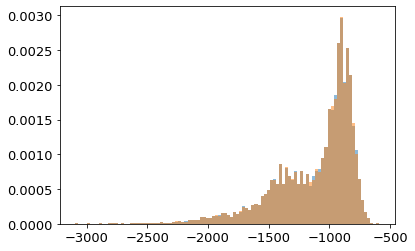

0.0011682510375976562


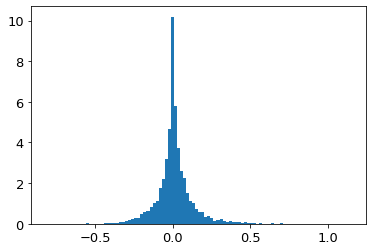

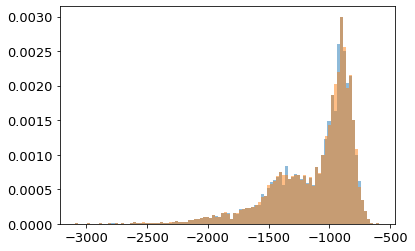

0.0037412643432617188


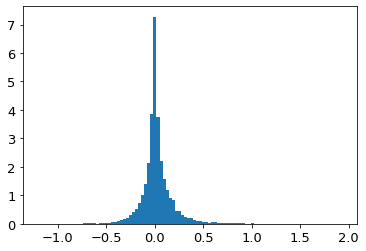

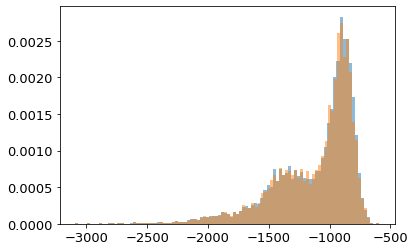

1.3575992584228516


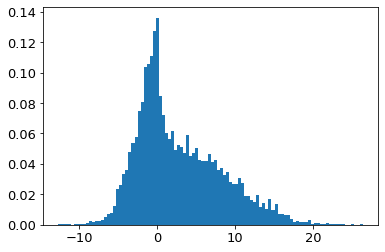

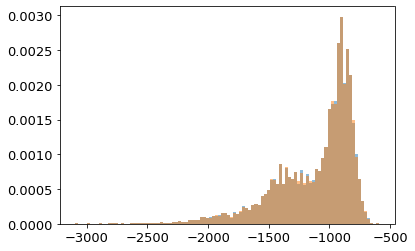

0.0011386871337890625


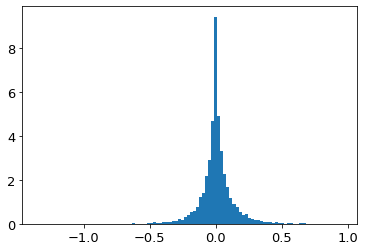

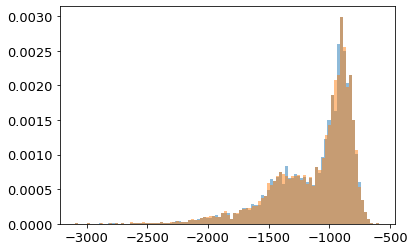

0.0014824867248535156


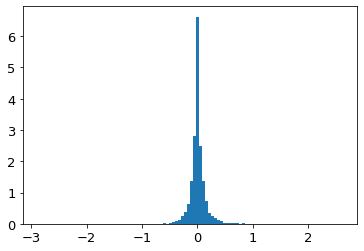

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


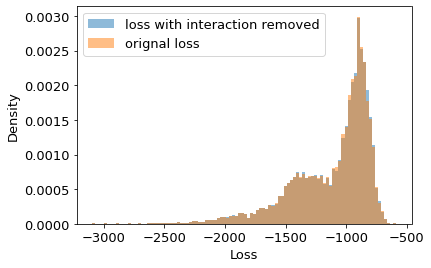

Median paired difference: 0.00943613052368164


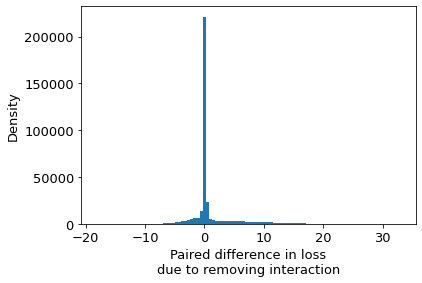

In [145]:
origpred_losses = []
maineff_losses = []
for modeltoplot in failed_paired_wilcoxon_negcontrol:
  single_model_result = negcontrol_results[modeltoplot]
  test_toanalyze_maineffpreds_loss=single_model_result.test_toanalyze_maineffpreds_loss
  test_toanalyze_origpreds_loss=single_model_result.test_toanalyze_origpreds_loss
  difference = test_toanalyze_maineffpreds_loss-test_toanalyze_origpreds_loss
  
  origpred_losses.extend(test_toanalyze_origpreds_loss)
  maineff_losses.extend(test_toanalyze_maineffpreds_loss)
  
  plt.hist(test_toanalyze_maineffpreds_loss, alpha=0.5, density=True, bins=100)
  plt.hist(test_toanalyze_origpreds_loss, alpha=0.5, density=True, bins=100)
  plt.show()
  print(np.median(difference))
  plt.hist(difference, density=True, bins=100)
  plt.show()
  
handles = []
handles.append(plt.hist(maineff_losses, alpha=0.5, density=True, bins=100))
handles.append(plt.hist(origpred_losses, alpha=0.5, density=True, bins=100))
plt.legend(handles, labels=["loss with interaction removed", "orignal loss"])
plt.xlabel("Loss")
plt.ylabel("Density")
plt.show()
difference = np.array(maineff_losses)-np.array(origpred_losses)
print("Median paired difference:", np.median(difference))
plt.hist(difference, bins=100)
plt.xlabel("Paired difference in loss\ndue to removing interaction")
plt.ylabel("Density")
plt.show()

negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed100_nlwef.h5


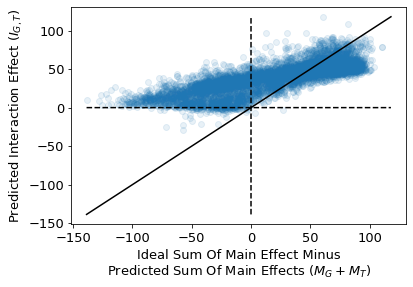

negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed100_lawff.h5


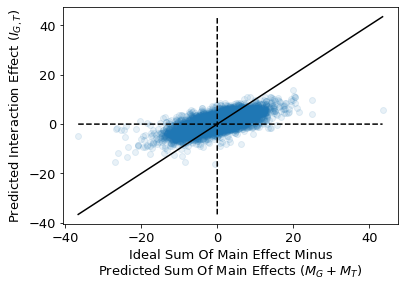

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed100_nfwlk.h5


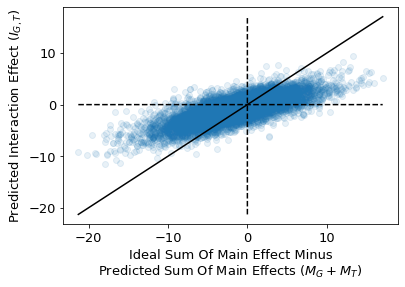

negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed100_tlobk.h5


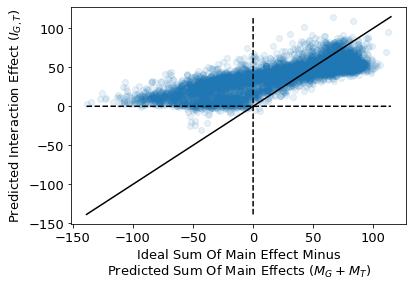

negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed100_ntgvf.h5


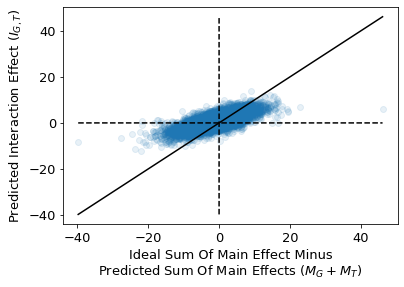

negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed100_koolv.h5


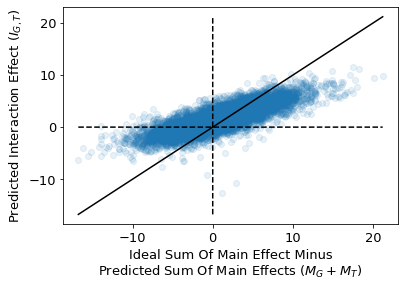

negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed100_hkvqp.h5


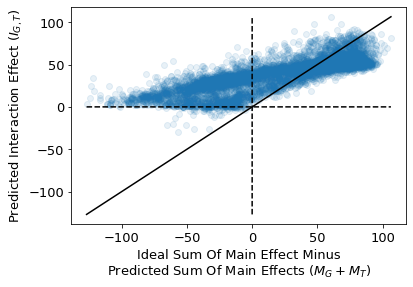

negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed100_ojogi.h5


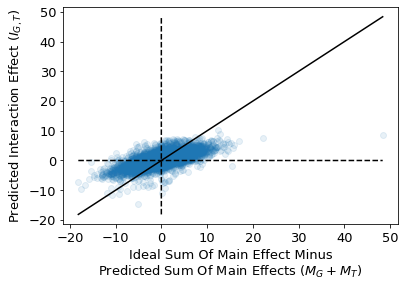

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed100_mtaow.h5


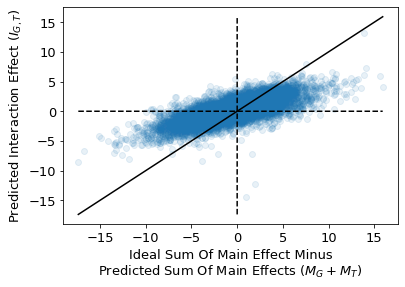

negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed200_zrhsq.h5


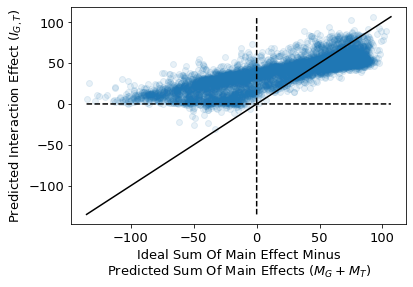

negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed200_rhgkp.h5


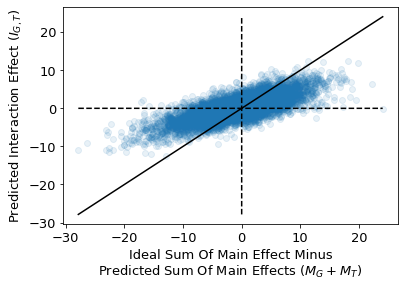

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed200_oqbpf.h5


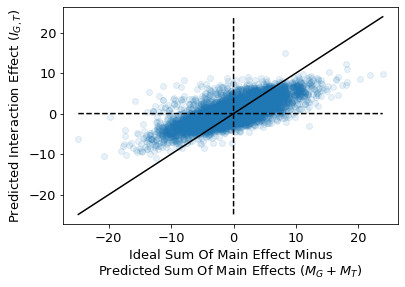

negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed200_bihfz.h5


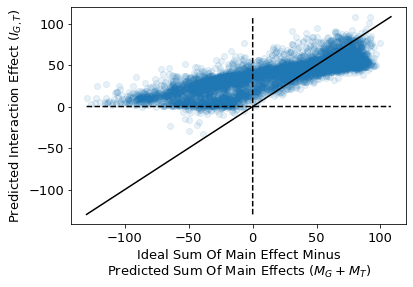

negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed200_fxrui.h5


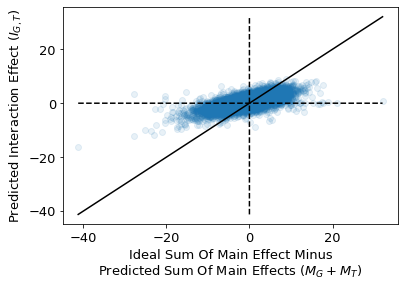

negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed200_fhpbi.h5


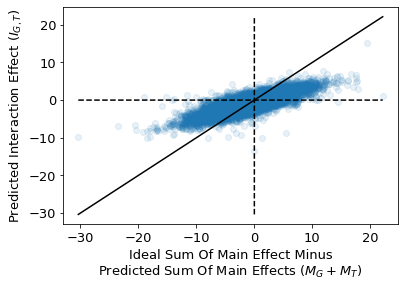

negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed200_sqdbm.h5


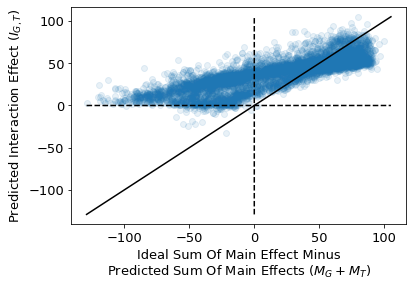

negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed200_cmmyx.h5


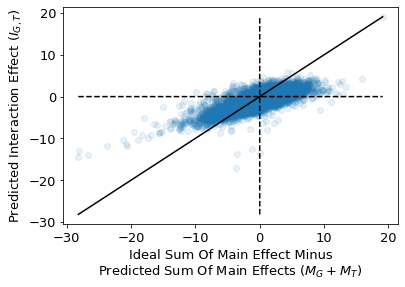

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed200_plosl.h5


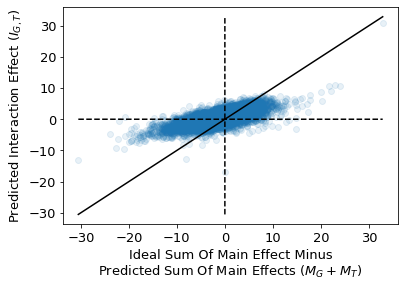

negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed300_giyhi.h5


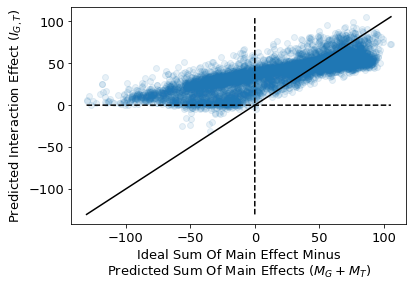

negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed300_pbhsj.h5


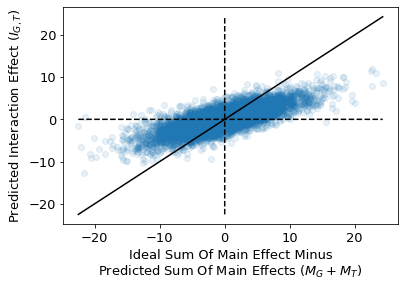

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed300_umbcx.h5


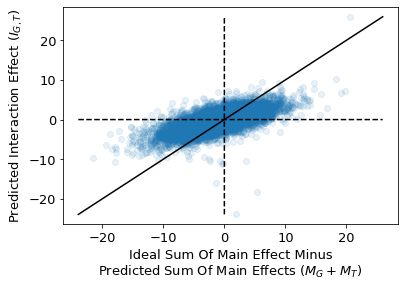

negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed300_fmqxy.h5


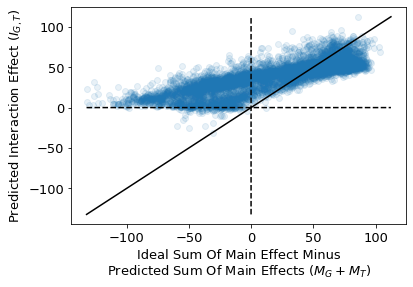

negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed300_ehvbn.h5


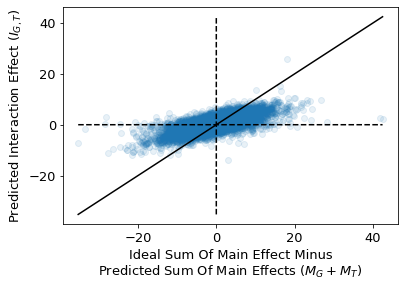

negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed300_umhto.h5


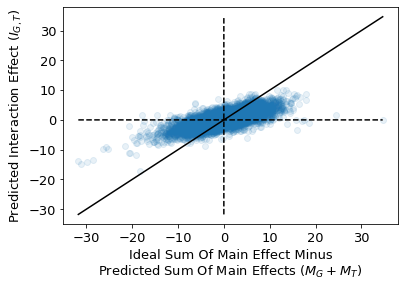

negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed300_juibt.h5


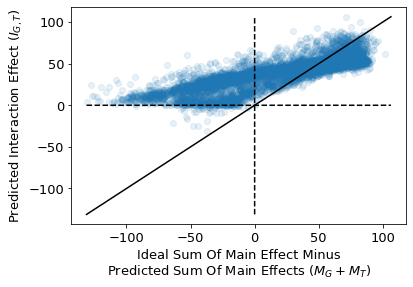

negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed300_ydzzn.h5


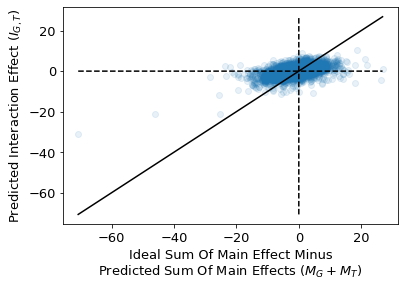

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed300_twddp.h5


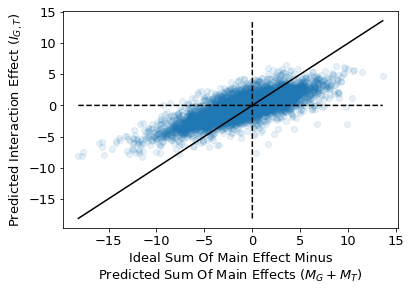

negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed400_rrtmx.h5


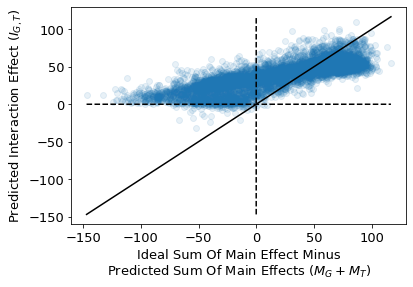

negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed400_klhqe.h5


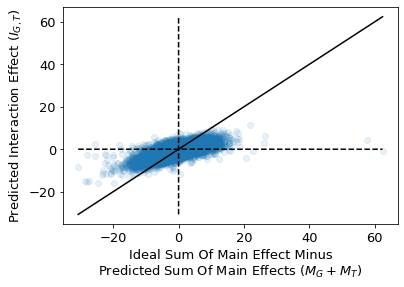

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed400_hctws.h5


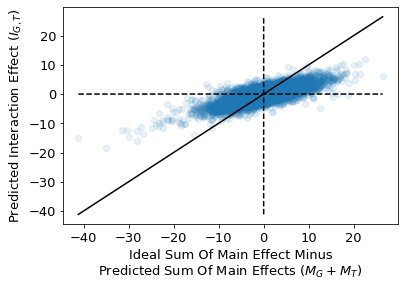

negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed400_hdntv.h5


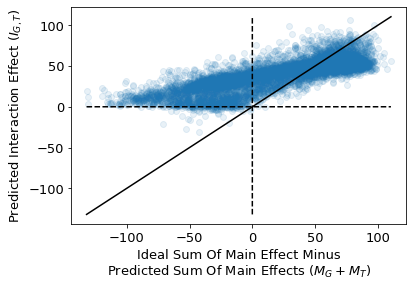

negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed400_onwci.h5


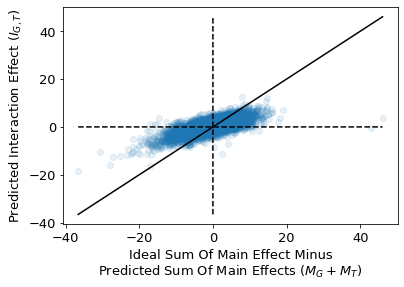

negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed400_egnrs.h5


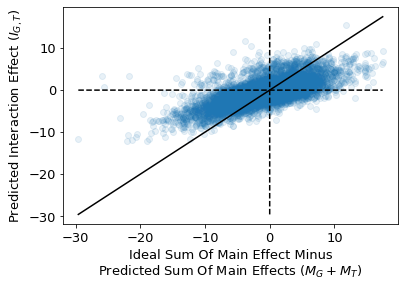

negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed400_bsmim.h5


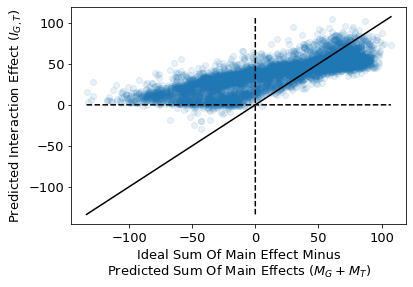

negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed400_ljhxs.h5


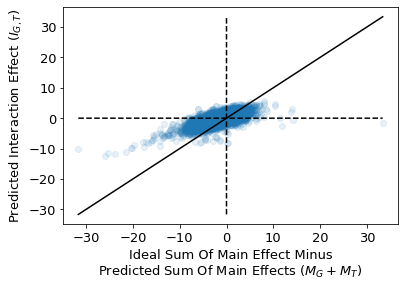

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed400_ociwk.h5


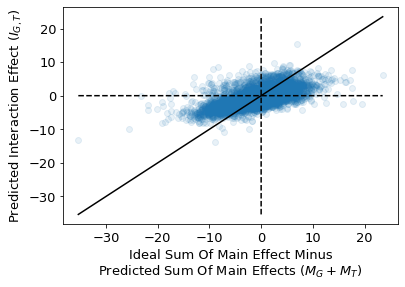

negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0_seed500_guxmk.h5


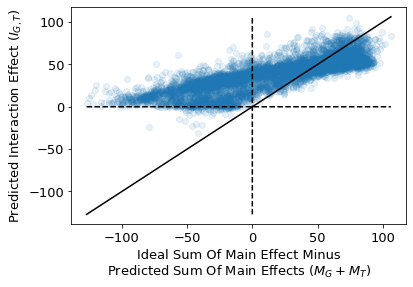

negcontrol_model-rescalepoisson_skipconn_l1reg-0.0_seed500_xmxvx.h5


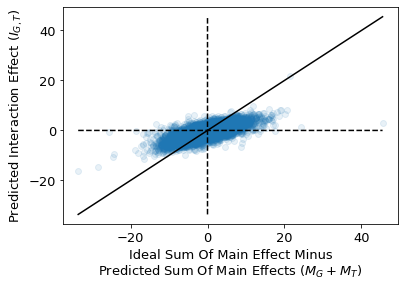

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0_seed500_xnkrd.h5


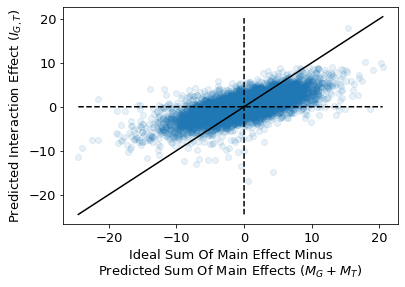

negcontrol_model-rescalepoisson_sanitycheck_l1reg-1e-05_seed500_wbntp.h5


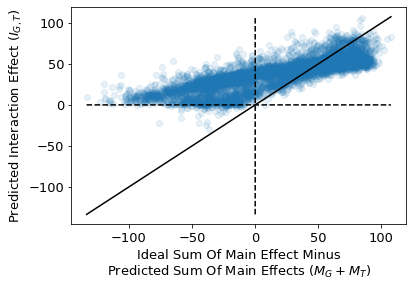

negcontrol_model-rescalepoisson_skipconn_l1reg-1e-05_seed500_kiyug.h5


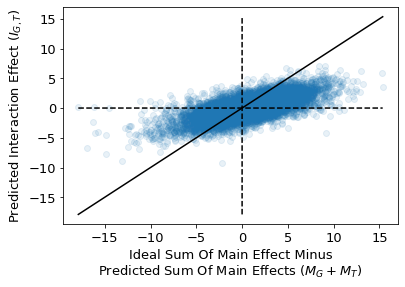

negcontrol_model-rescalepoisson_onelayer_l1reg-1e-05_seed500_pczyj.h5


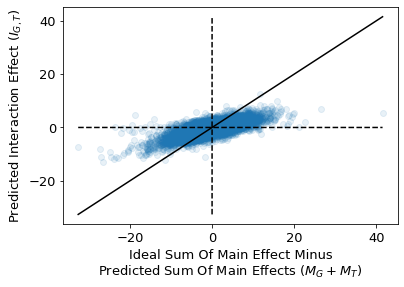

negcontrol_model-rescalepoisson_sanitycheck_l1reg-0.0001_seed500_gpagt.h5


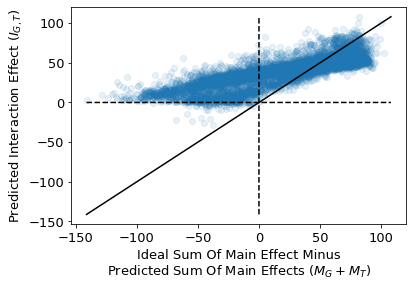

negcontrol_model-rescalepoisson_skipconn_l1reg-0.0001_seed500_fsada.h5


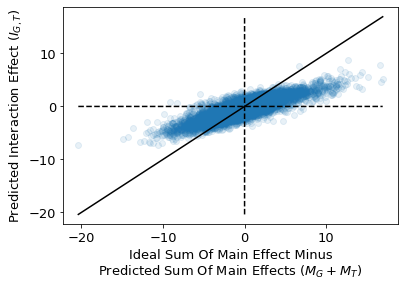

negcontrol_model-rescalepoisson_onelayer_l1reg-0.0001_seed500_rgimu.h5


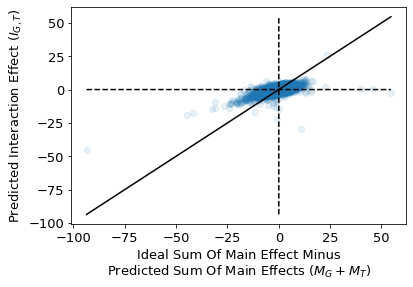

In [146]:
for modeltoplot in failed_paired_wilcoxon_negcontrol:
  print(modeltoplot)
  single_model_result = negcontrol_results[modeltoplot]
  test_main_effs = (
    single_model_result.test_toanalyze_interactioneffectdata.A_main_eff
    + single_model_result.test_toanalyze_interactioneffectdata.B_main_eff)

  test_main_eff_error = test_toanalyze_groundtruth_neg_maineff - test_main_effs

  test_intereff = (
        single_model_result.test_toanalyze_interactioneffectdata.inter_eff)

  xyaxis_scatterplot(test_main_eff_error, test_intereff, withxeqy=True, alpha=0.1)
  plt.xlabel("Ideal Sum Of Main Effect Minus\nPredicted Sum Of Main Effects ($M_{G} + M_{T}$)")
  plt.ylabel("Predicted Interaction Effect ($I_{G,T}$)")
  plt.show()

14.7253122519477


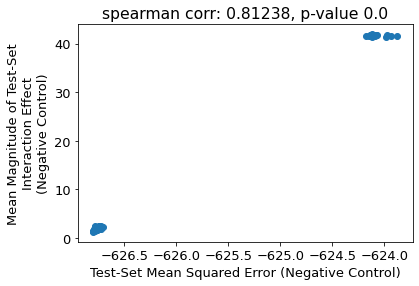

16.169145108391106


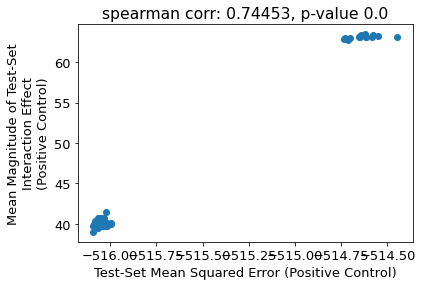

In [147]:
import scipy.stats

def plot_mse_v_intererr(results, description):
  xaxis = np.array([np.mean(results[modelname].overall_test_loss)
              for modelname in results.keys()])
  yaxis = np.array([np.mean(np.abs(results[modelname]
           .test_toanalyze_interactioneffectdata.inter_eff))
           for modelname in results])
  m, b = np.polyfit(xaxis, yaxis, 1)
  print(m)
  plt.scatter(xaxis, yaxis)
  #plt.plot(xaxis, m*xaxis + b, color="black")
  plt.xlabel("Test-Set Mean Squared Error ("+description+")")
  plt.ylabel("Mean Magnitude of Test-Set\nInteraction Effect\n("
             +description+")")
  spearman = scipy.stats.spearmanr(xaxis, yaxis)
  plt.title("spearman corr: "
            +str(np.round(spearman.correlation,5))+
            ", p-value "+str(np.round(spearman.pvalue,5)))
  plt.show()
  

plot_mse_v_intererr(results=negcontrol_results,
                    description="Negative Control")
plot_mse_v_intererr(results=poscontrol_results,
                    description="Positive Control")

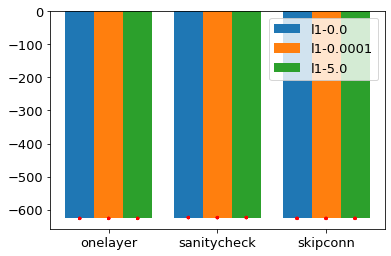

In [148]:
from collections import OrderedDict
from matplotlib import pyplot as plt

def barplot_performance(results):

  tohighlight = set([x for x in results.keys() if
      results[x].test_toanalyze_lossimprovement_wilcoxon.pvalue < 0.05])

  arch_to_l1_to_perfs = OrderedDict()
  arch_to_l1_to_names = OrderedDict()
  for modelname in sorted(results.keys()):
    #print(modelname)
    _, _, arch, l1regstring, seedstring, _ = modelname.split("_")
    l1 = float(l1regstring.split("-")[-1])
    if arch not in arch_to_l1_to_perfs:
      arch_to_l1_to_perfs[arch] = OrderedDict()
      arch_to_l1_to_names[arch] = OrderedDict()
    if l1 not in arch_to_l1_to_perfs[arch]:
      arch_to_l1_to_perfs[arch][l1] = []
      arch_to_l1_to_names[arch][l1] = []
    arch_to_l1_to_perfs[arch][l1].append(
        np.mean(results[modelname].overall_test_loss))
    arch_to_l1_to_names[arch][l1].append(modelname)

  archs = list(arch_to_l1_to_perfs.keys())
  l1s = sorted(list(list(arch_to_l1_to_perfs.items())[0][-1]))
  num_seeds = len(arch_to_l1_to_perfs[archs[0]][l1s[0]])

  fig, ax = plt.subplots()
  width = (1.0/len(l1s))*0.8         # the width of the bars
  handles = []
  for l1idx,l1 in enumerate(l1s):
    #c=["red" if (arch_to_l1_to_names[arch][l1] in tohighlight)
    #   else "black" for arch in archs]
    barheights = [np.mean(arch_to_l1_to_perfs[arch][l1]) for arch in archs]
    handles.append(ax.bar(np.arange(len(archs))+l1idx*width,
                   barheights, width, alpha=1, zorder=0)[0])
    for i in range(num_seeds):
      ax.scatter(np.arange(len(archs))+l1idx*width,
                 [arch_to_l1_to_perfs[arch][l1][i] for arch in archs],
                 c=[(1,0,0) if (arch_to_l1_to_names[arch][l1][i] in tohighlight)
                    else (0,0,0) for arch in archs],
                 s=5)
  ax.legend(handles, ['l1-'+str(x) for x in l1s])
  ax.autoscale_view()
  ax.set_xticks(np.arange(len(archs)) + width)
  ax.set_xticklabels(archs) 

  plt.show()

barplot_performance(negcontrol_results)
#np.mean(negcontrol_results['negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed100_bemnn.h5'].
#        overall_test_loss)

In [149]:
import pandas
from collections import OrderedDict

def extract_from_results(arr, extraction_func):
  return [extraction_func(x) for x in arr.values()]

def prepare_results_summary(results):
  fields = [("modelfiles", sorted(list(results.keys()))) ]
  fields += [
  ("overall test loss", extract_from_results(arr=results,
   extraction_func=lambda x: np.mean(x.overall_test_loss) )),
  ("mean abs test toanalyze inter eff data", extract_from_results(arr=results,
  extraction_func=lambda x: np.mean(np.abs(x.test_toanalyze_interactioneffectdata.inter_eff)))),
  ("test lossimp - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_lossimprovement_wilcoxon.pvalue)),
  ("test lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_lossimprovement_mannwhit.pvalue)),
  ("test v controltest lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_controltest_lossimp_mannwhit.pvalue)),
  ("test v controltest intereff mag - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_controltest_intereff_mag_mannwhit.pvalue)),
  ("train lossimp - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_toanalyze_lossimprovement_wilcoxon.pvalue)),
  ("train lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_toanalyze_lossimprovement_mannwhit.pvalue)),
  ("train v controltrain lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_v_controltrain_lossimp_mannwhit.pvalue)),
  ("train v controltrain intereff mag - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_v_controltrain_intereff_mag_mannwhit.pvalue)),
  ("test intereff - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_intereff_wilcoxon.pvalue)),
  ("test v shuff intereff mag mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_shuff_intereff_mag_mannwhit.pvalue)),
  ("test v shuff lossimp mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_shuff_lossimp_mannwhit.pvalue)),
  ]
  return pandas.DataFrame(OrderedDict(fields))

negcontrol_results_summary = prepare_results_summary(negcontrol_results)
poscontrol_results_summary = prepare_results_summary(poscontrol_results)

In [150]:
negcontrol_results_summary

modelfiles  ...  test v shuff lossimp mannwhit
0   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                  1.439721e-120
1   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   4.360129e-01
2   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   1.146348e-01
3   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                  1.034205e-112
4   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   2.102385e-01
5   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   1.920477e-01
6   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                  3.382397e-135
7   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   9.932410e-01
8   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   8.530180e-01
9   negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                  2.624459e-129
10  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   2.771214e-01
11  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   9.212509e-01
12  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                  7.015356e-123
13  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   3.665329e-01
14  negcontrol_model-rescalepoisson_onelayer_l1reg...  ...                   2.444095e-01
15  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                  3.441749e-141
16  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   1.542172e-01
17  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   9.570753e-01
18  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                  1.602876e-144
19  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   6.200758e-01
20  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   2.744183e-01
21  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                  7.844279e-100
22  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   2.023850e-01
23  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   7.794021e-02
24  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                  1.110946e-143
25  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   7.774887e-01
26  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   9.944928e-01
27  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                  2.904510e-113
28  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   2.254275e-02
29  negcontrol_model-rescalepoisson_sanitycheck_l1...  ...                   3.043465e-01
30  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                  1.595660e-104
31  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   1.870939e-01
32  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   8.175088e-01
33  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                  6.440921e-112
34  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   9.781185e-01
35  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   9.551332e-01
36  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                  1.109174e-113
37  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   2.088861e-01
38  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   3.600771e-02
39  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                  7.113609e-158
40  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   8.053979e-01
41  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   1.816022e-02
42  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                  1.056897e-127
43  negcontrol_model-rescalepoisson_skipconn_l1reg...  ...                   9.4973

In [151]:
poscontrol_results_summary

modelfiles  ...  test v shuff lossimp mannwhit
0   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
1   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
2   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
3   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
4   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
5   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
6   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
7   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
8   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
9   poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
10  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
11  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
12  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
13  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
14  poscontrol_model-rescalepoisson_onelayer_l1reg...  ...                            0.0
15  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
16  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
17  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
18  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
19  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
20  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
21  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
22  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
23  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
24  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
25  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
26  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
27  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
28  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
29  poscontrol_model-rescalepoisson_sanitycheck_l1...  ...                            0.0
30  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
31  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
32  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
33  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
34  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
35  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
36  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
37  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
38  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
39  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
40  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
41  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
42  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                            0.0
43  poscontrol_model-rescalepoisson_skipconn_l1reg...  ...                         

WilcoxonResult(statistic=23163249.5, pvalue=4.361708358908372e-275)
1.3846158981323242


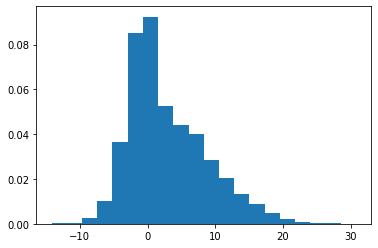

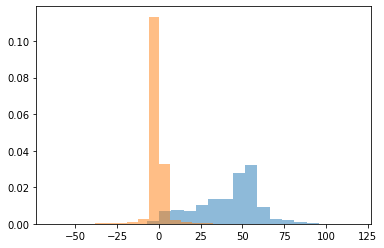

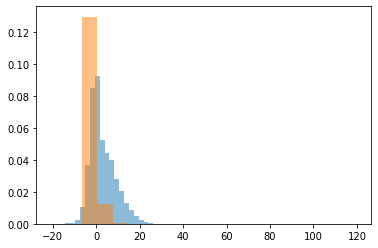

In [152]:
#sanity check single model

interaction_analysis = negcontrol_results[list(negcontrol_results.keys())[0]]
#interaction_analysis = poscontrol_results["poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5"]

%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats

print(scipy.stats.wilcoxon(
    x=interaction_analysis.test_toanalyze_lossimprovement,
    alternative="greater"))
print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
plt.hist(interaction_analysis.test_toanalyze_lossimprovement, density=True, bins=20)
plt.show()

plt.hist(interaction_analysis.test_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.show()

"""plt.hist(np.abs(interaction_analysis.test_toanalyze_interactioneffectdata.inter_eff)/
         (np.abs(interaction_analysis.test_toanalyze_interactioneffectdata.A_main_eff
          + interaction_analysis.test_toanalyze_interactioneffectdata.B_main_eff)),
         density=True, bins=20, alpha=0.5)
plt.hist(np.abs(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff)/
         (np.abs(interaction_analysis.shuff_toanalyze_interactioneffectdata.A_main_eff
          + interaction_analysis.shuff_toanalyze_interactioneffectdata.B_main_eff)),
         density=True, bins=20, alpha=0.5)
plt.show()""" #doesn't work cos sum on main off on dn shuff seqs can be tiny

#print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
#print(np.median(interaction_analysis.shuff_toanalyze_lossimprovement))

plt.hist(interaction_analysis.test_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.show()